# Artificial Intelligence - Local Search

Local Search Implementation to Search Solution for Diagonal Magic Cube.

## 0. Initiation

### 0.1 Import Modules

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Initiate Cubes and Global Variables

In [2]:
init_cube1 = [[[i+(5*j)+(25*k) for i in range(1,6)] for j in range(0,5)] for k in range(0,5)]
init_cube2 = [[[((i+(5*j)+(25*k)+42)%125 + 1) for i in range(1,6)] for j in range(0,5)] for k in range(0,5)]
init_cube3 = [[[((i+(5*j)+(25*k)+84)%125 + 1) for i in range(1,6)] for j in range(0,5)] for k in range(0,5)]
init_cubes = [np.array(init_cube1).flatten().tolist(),
                  np.array(init_cube2).flatten().tolist(),
                  np.array(init_cube3).flatten().tolist()]

In [3]:
num_experiment = 3

### 0.3 Utils

In [88]:
def displayMatrixLayers(cube, title="3D Cube Matrix Layers", fitnessvalue=None):
    matrix_3d = np.array(cube)
    global_min = matrix_3d.min()
    global_max = matrix_3d.max()

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    plt.subplots_adjust(top=0.92)
    
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    
    if fitnessvalue is not None:
        fig.text(0.5, 0.96, f"Fitness Value: {fitnessvalue}", ha='center', fontsize=12)

    for i in range(5):
        layer = matrix_3d[i, :, :]
        
        row = i // 3
        col = i % 3

        sns.heatmap(layer, annot=True, fmt='d', cmap='plasma', ax=axes[row, col], 
                    cbar=False,
                    vmin=global_min,
                    vmax=global_max, 
                    xticklabels=[],
                    yticklabels=[])

        axes[row, col].set_title(f'Matrix Level {i + 1}')

    for j in range(i + 1, 6):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout(rect=[0, 0, 1, 0.88])
    plt.show()


In [96]:
def displayPlotValuePerIteration(values, title ='Objective Function Value' ):
    array = np.array(values)
    
    x = np.arange(1, len(array) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(x, array, marker='o', linestyle='-', color='b', label=title)
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.title('Objective Function per Iteration')
    plt.legend()
    plt.grid(True)
    plt.show()


def displayPlotRestartPerExperiment(iteration):
    array = np.array(iteration)
    
    x = np.arange(1, len(array) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(x, array, marker='o', linestyle='-', color='b', label='Objective Function Value')
    plt.xlabel('restart - x')
    plt.ylabel('N iterations')
    plt.title('Iteration per Restart')
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
def displayPlotProbabilityMove(probs):
    data = probs
    
    x = np.array(list(data.keys()))
    y = np.array(list(data.values()))

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker='o', linestyle='-', color='r', label='Move Probability')
    plt.xlabel('Iteration')
    plt.ylabel('Move Probability')
    plt.title('Move Probability')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()

## 1. Steepest Ascent Hill-climbing

### 1.0. Program

In [7]:
from SteepestAscentHillClimbing import SteepestAscentHillClimbingCube
execution_time_each_experiment = []
cubes_each_experiment = []
values_each_experiment = []
iteration_each_experiment = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter = SteepestAscentHillClimbingCube(cube)
    end_time = time.perf_counter()
    execution_time_each_experiment.append(end_time-start_time)
    
    cubes_each_experiment.append(cubes)
    values_each_experiment.append(values)
    iteration_each_experiment.append(count_iter)

Current val:  13
Current val:  14
Current val:  15
Current val:  16
Current val:  17
Current val:  19
Current val:  20
Current val:  22
Current val:  23
Current val:  24
Current val:  25
Current val:  26
Current val:  27
Current val:  28
Current val:  29
Current val:  30
Current val:  31
Current val:  32
Current val:  33
Current val:  34
Current val:  35
Current val:  36
Current val:  37
Current val:  38
Current val:  39
Current val:  40
Current val:  41
Current val:  42
Current val:  43
Current val:  44
Current val:  1
Current val:  6
Current val:  9
Current val:  12
Current val:  14
Current val:  16
Current val:  18
Current val:  19
Current val:  21
Current val:  23
Current val:  24
Current val:  25
Current val:  27
Current val:  28
Current val:  29
Current val:  31
Current val:  32
Current val:  33
Current val:  34
Current val:  35
Current val:  36
Current val:  37
Current val:  38
Current val:  39
Current val:  40
Current val:  41
Current val:  42
Current val:  43
Current val:  4
C

### 1.1. First Experiment Result

In [8]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", execution_time_each_experiment[0])

Total iteration:  30
Execution time:  40.368155082978774


#### 1.1.1. Initial State

In [50]:
displayMatrixLayers(cubes_each_experiment[0][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][0])

IndexError: list index out of range

#### 1.1.2. Final State

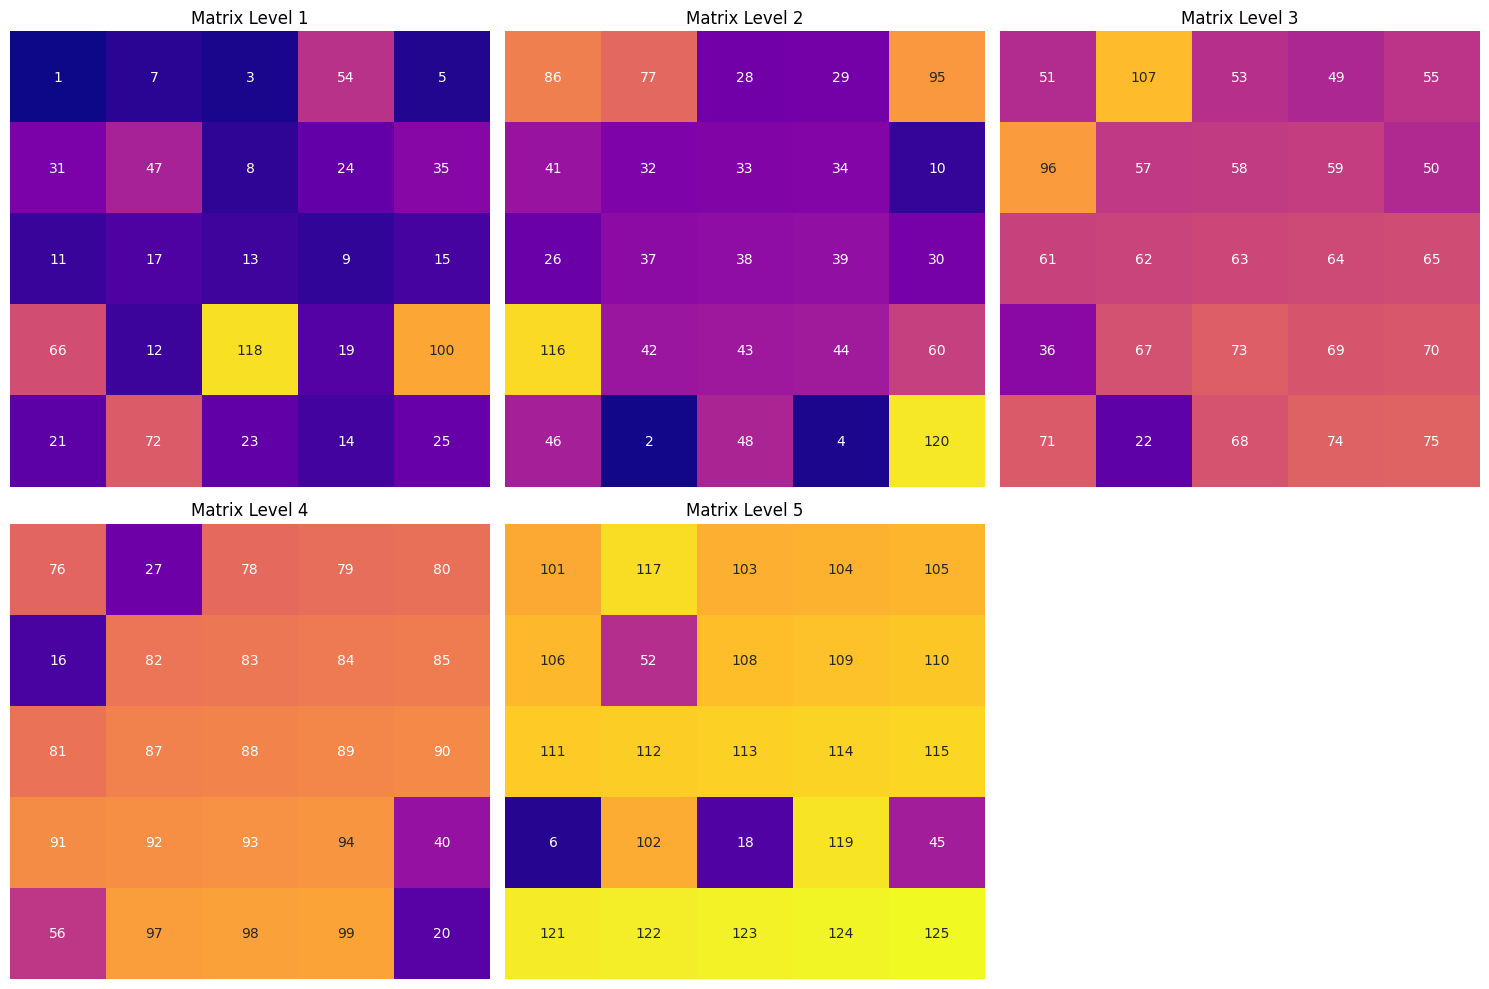

Objective Function Value:  44


In [10]:
displayMatrixLayers(cubes_each_experiment[0][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 1.1.3. Objective Function Value Plot on Each Iteration

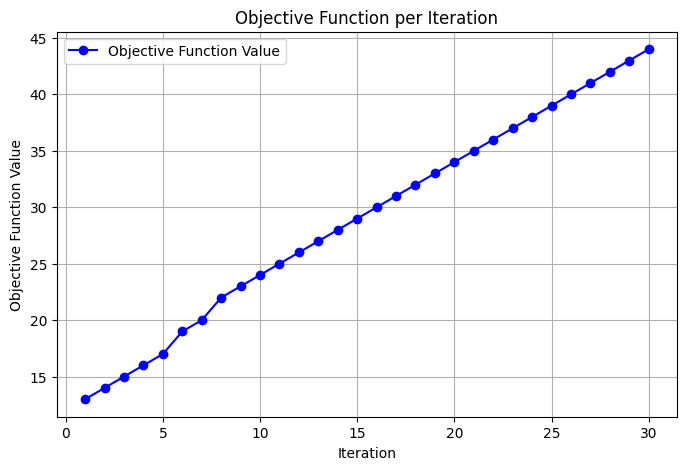

In [11]:
displayPlotValuePerIteration(values_each_experiment[0])

### 1.2. Second Experiment Result

#### 1.2.1. Initial State

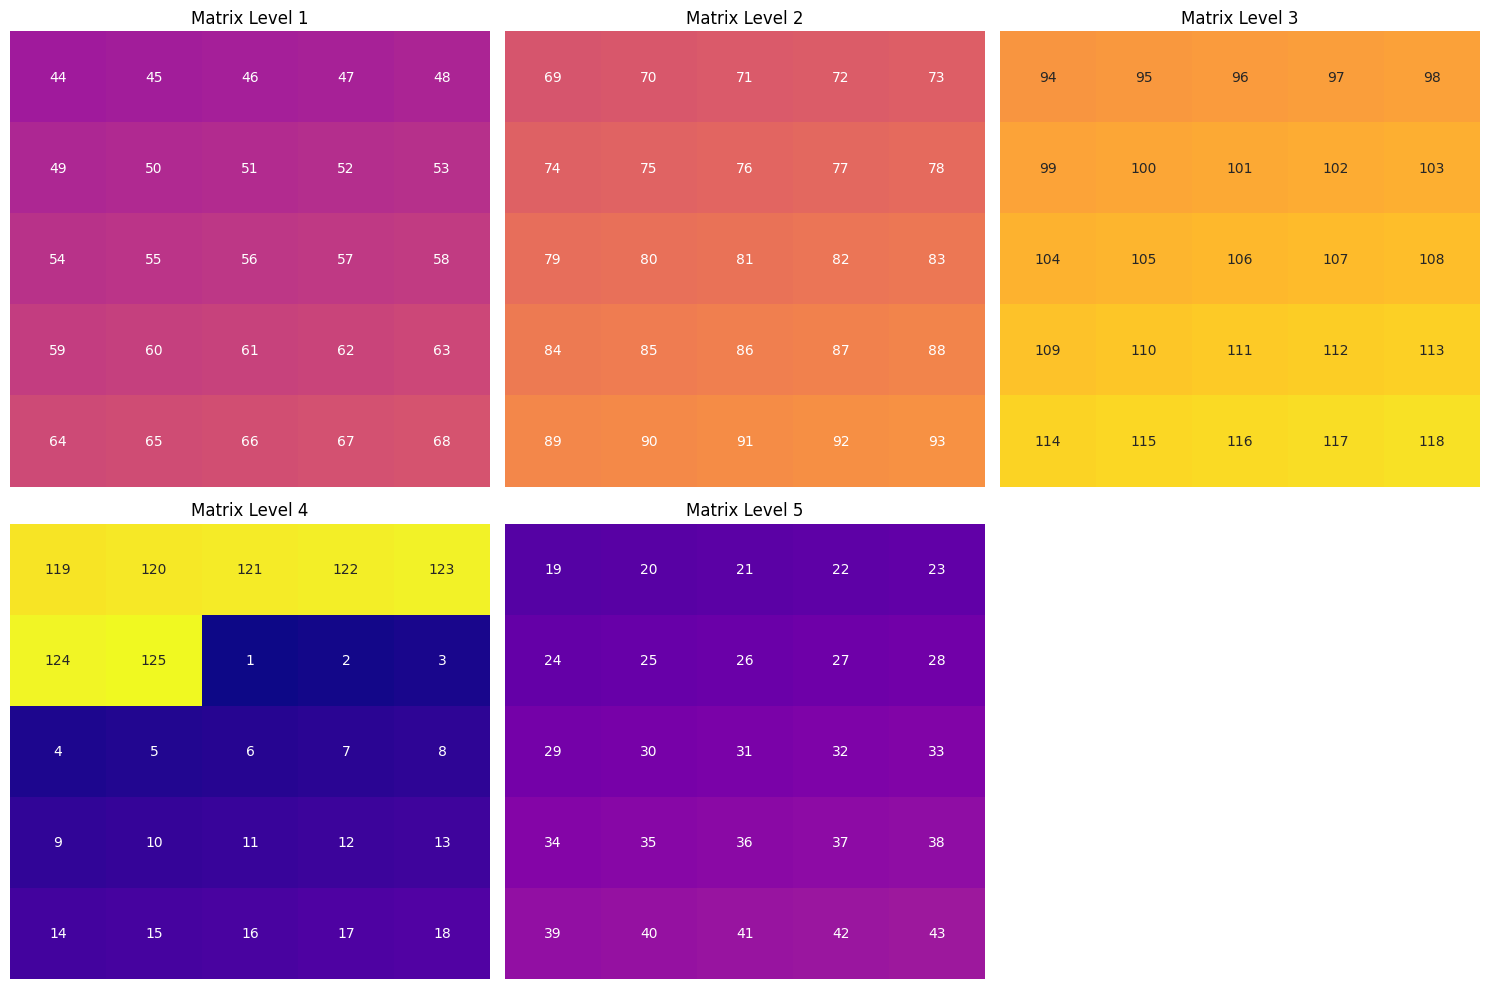

Objective Function Value:  1


In [12]:
displayMatrixLayers(cubes_each_experiment[1][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][0])

#### 1.2.2. Final State

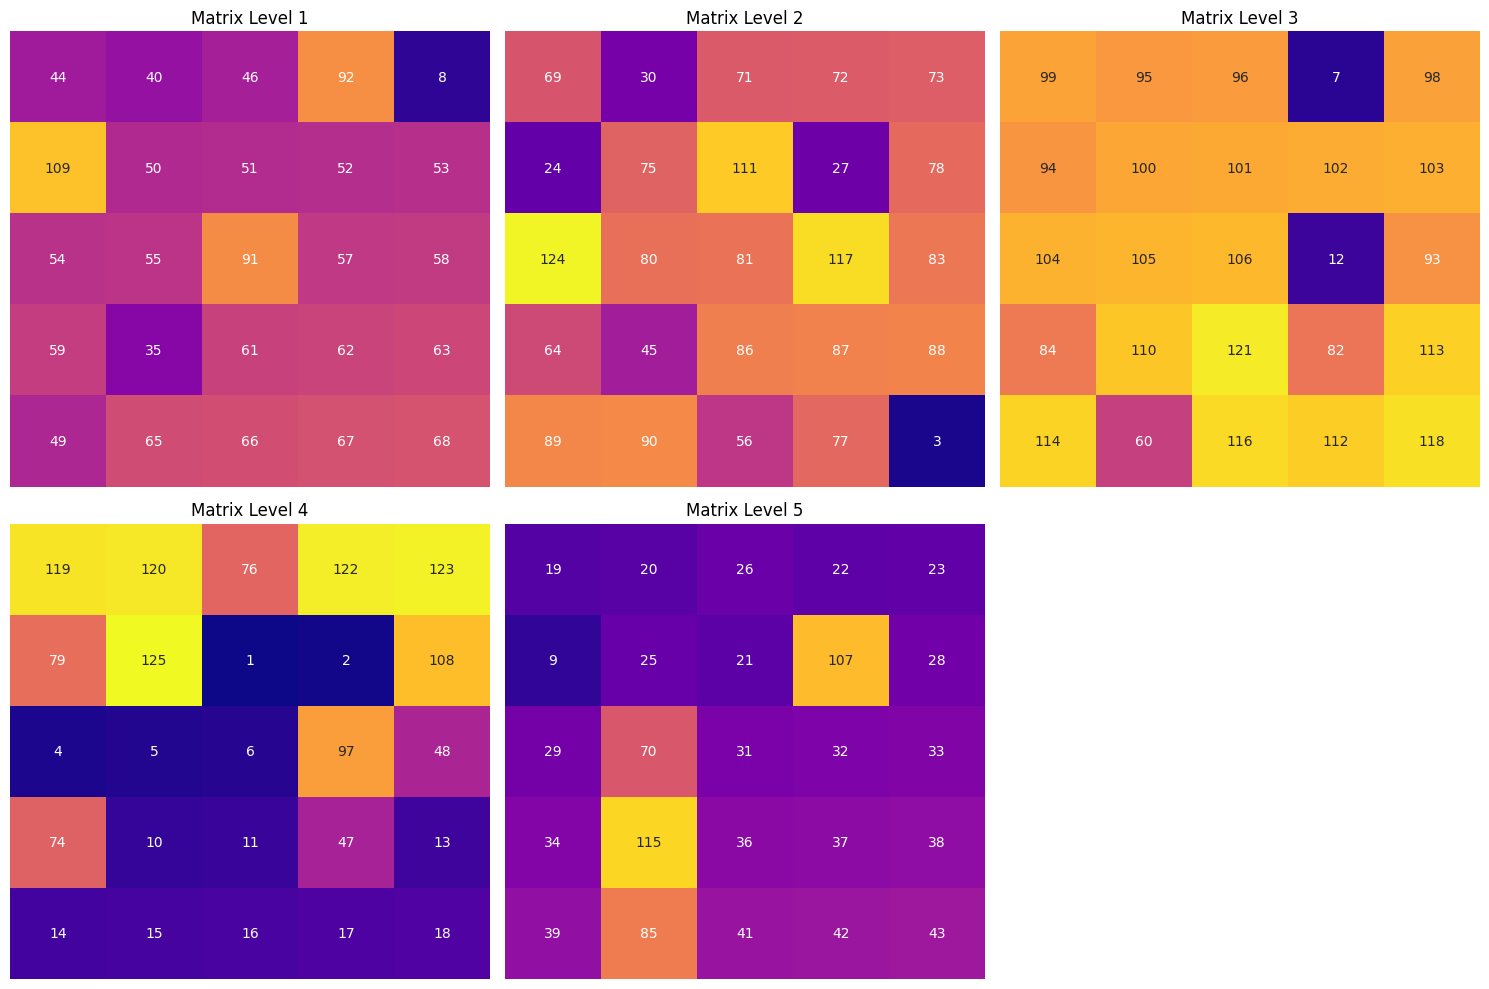

Objective Function Value:  43


In [13]:
displayMatrixLayers(cubes_each_experiment[1][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 1.2.3. Objective Function Value Plot on Each Iteration

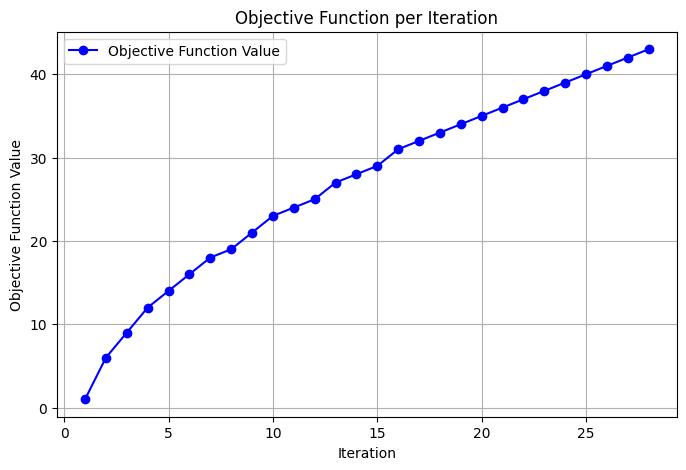

In [14]:
displayPlotValuePerIteration(values_each_experiment[1])

### 1.3. Third Experiment Result

#### 1.3.1. Initial State

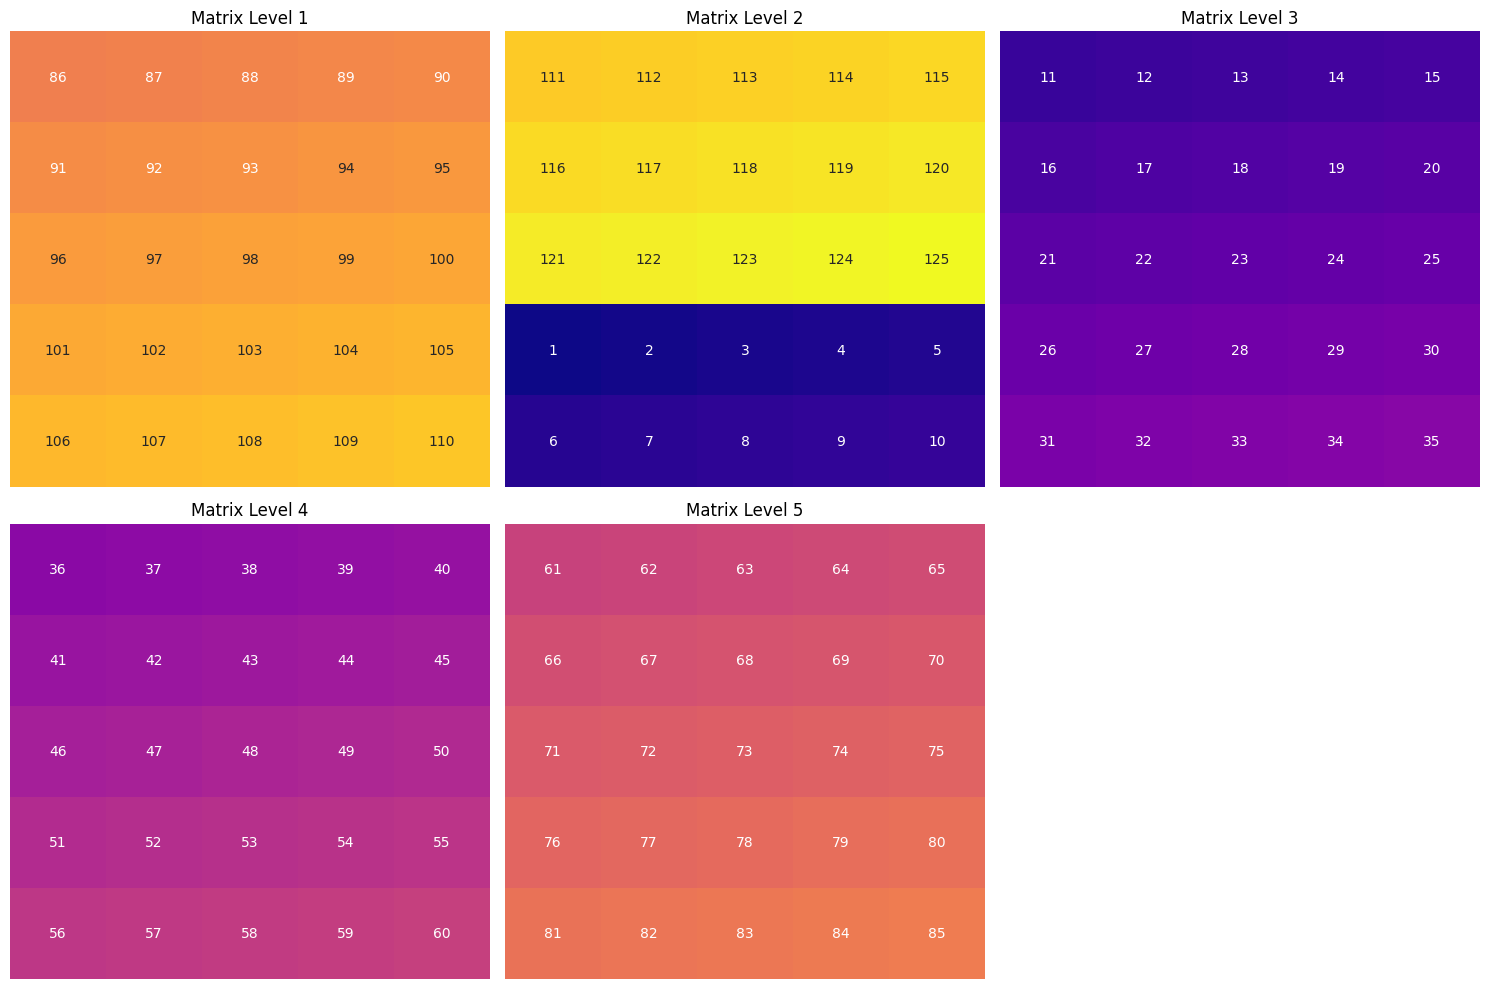

Objective Function Value:  4


In [15]:
displayMatrixLayers(cubes_each_experiment[2][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][0])

#### 1.3.2. Final State

In [51]:
displayMatrixLayers(cubes_each_experiment[2][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][-1])

IndexError: list index out of range

#### 1.3.3. Objective Function Value Plot on Each Iteration

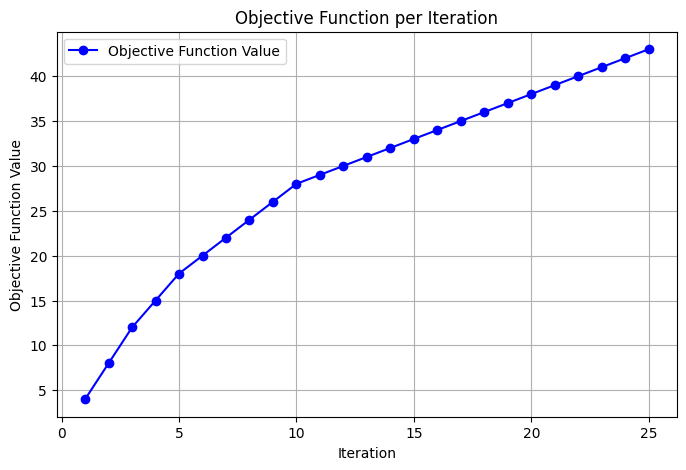

In [17]:
displayPlotValuePerIteration(values_each_experiment[2])

## 2. Hill-climbing with Sideways Move

### 2.0. Program

In [18]:
from HillClimbingWithSidewaysMove import HillClimbingWithSidewaysMoveCube
param_max_sideways = 10
exec_time_each_experiment = []
cubes_tiap_percobaan = []
values_tiap_percobaan = []
iteration_tiap_percobaan = []
cubes_each_experiment = []

for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter = HillClimbingWithSidewaysMoveCube(cube, param_max_sideways)
    end_time = time.perf_counter()
    
    exec_time_each_experiment.append(end_time-start_time)
    cubes_tiap_percobaan.append(cubes)
    values_tiap_percobaan.append(values)
    iteration_tiap_percobaan.append(count_iter)

2
Current val: 14 | Neighbor Val: 14 | Sideways Count: 0
3
Current val: 15 | Neighbor Val: 15 | Sideways Count: 0
4
Current val: 16 | Neighbor Val: 16 | Sideways Count: 0
5
Current val: 17 | Neighbor Val: 17 | Sideways Count: 0
6
Current val: 19 | Neighbor Val: 19 | Sideways Count: 0
7
Current val: 20 | Neighbor Val: 20 | Sideways Count: 0
8
Current val: 22 | Neighbor Val: 22 | Sideways Count: 0
9
Current val: 23 | Neighbor Val: 23 | Sideways Count: 0
10
Current val: 24 | Neighbor Val: 24 | Sideways Count: 0
11
Current val: 25 | Neighbor Val: 25 | Sideways Count: 0
12
Current val: 26 | Neighbor Val: 26 | Sideways Count: 0
13
Current val: 27 | Neighbor Val: 27 | Sideways Count: 0
14
Current val: 28 | Neighbor Val: 28 | Sideways Count: 0
15
Current val: 29 | Neighbor Val: 29 | Sideways Count: 0
16
Current val: 30 | Neighbor Val: 30 | Sideways Count: 0
17
Current val: 31 | Neighbor Val: 31 | Sideways Count: 0
18
Current val: 32 | Neighbor Val: 32 | Sideways Count: 0
19
Current val: 33 | N

### 2.1. First Experiment Result

In [19]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", exec_time_each_experiment[0])

Total iteration:  30
Execution time:  55.93965108299744


#### 2.1.1. Initial State

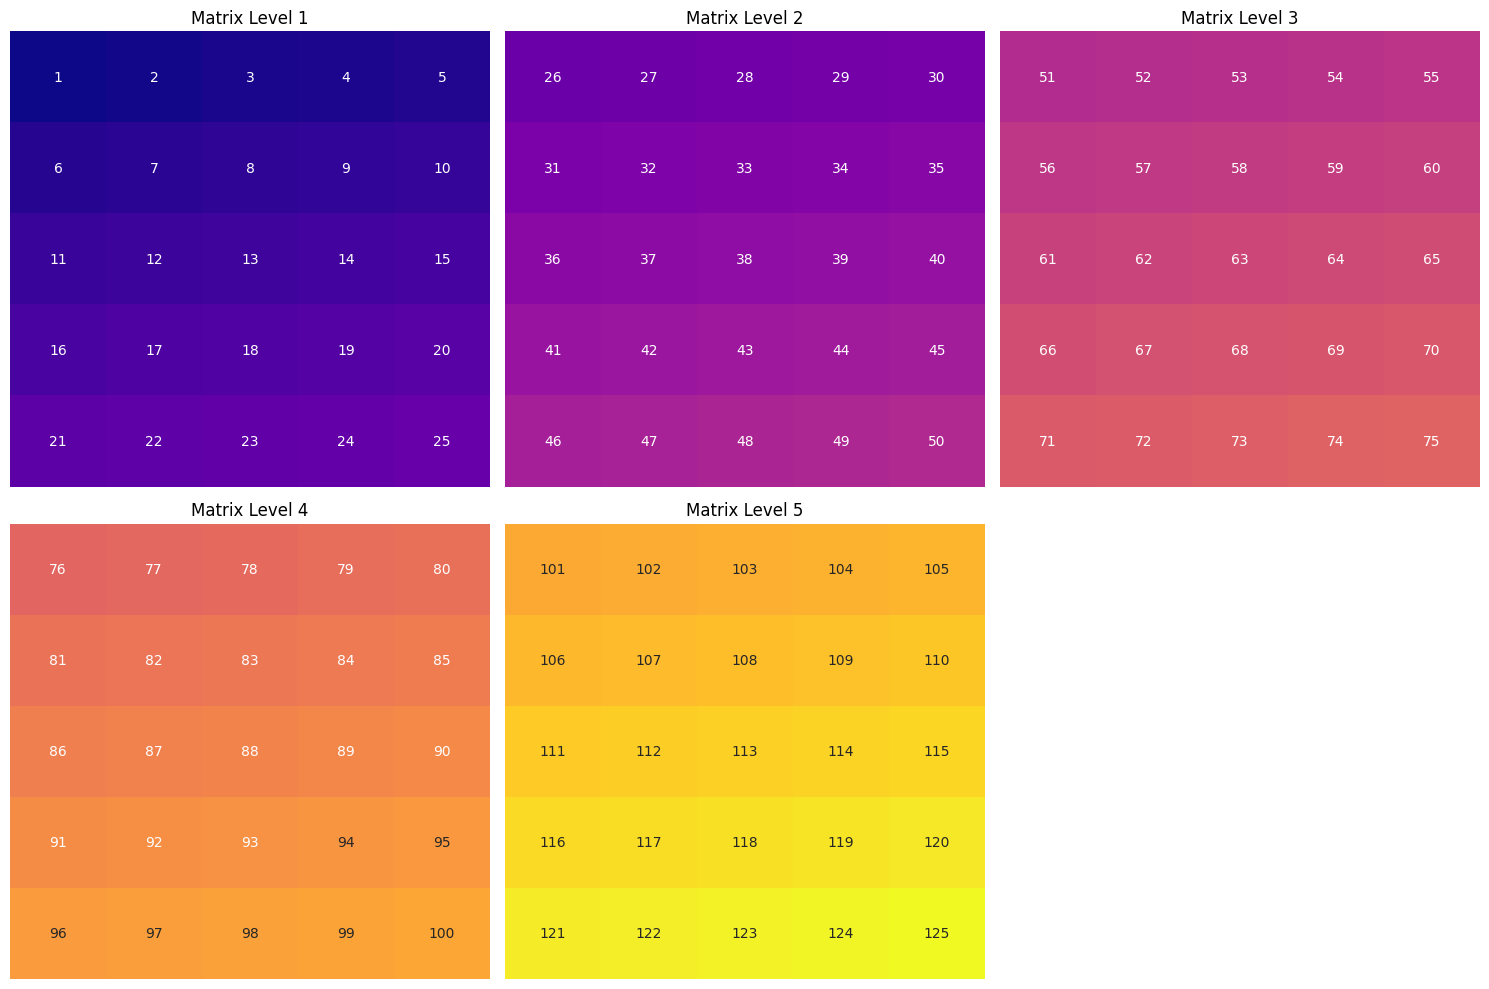

0
Objective Function Value:  13


In [20]:
displayMatrixLayers(cubes_tiap_percobaan[0][0].to_3d_array())
print(len(cubes_each_experiment))
print("Objective Function Value: ", values_each_experiment[0][0])

#### 2.1.2. Final State

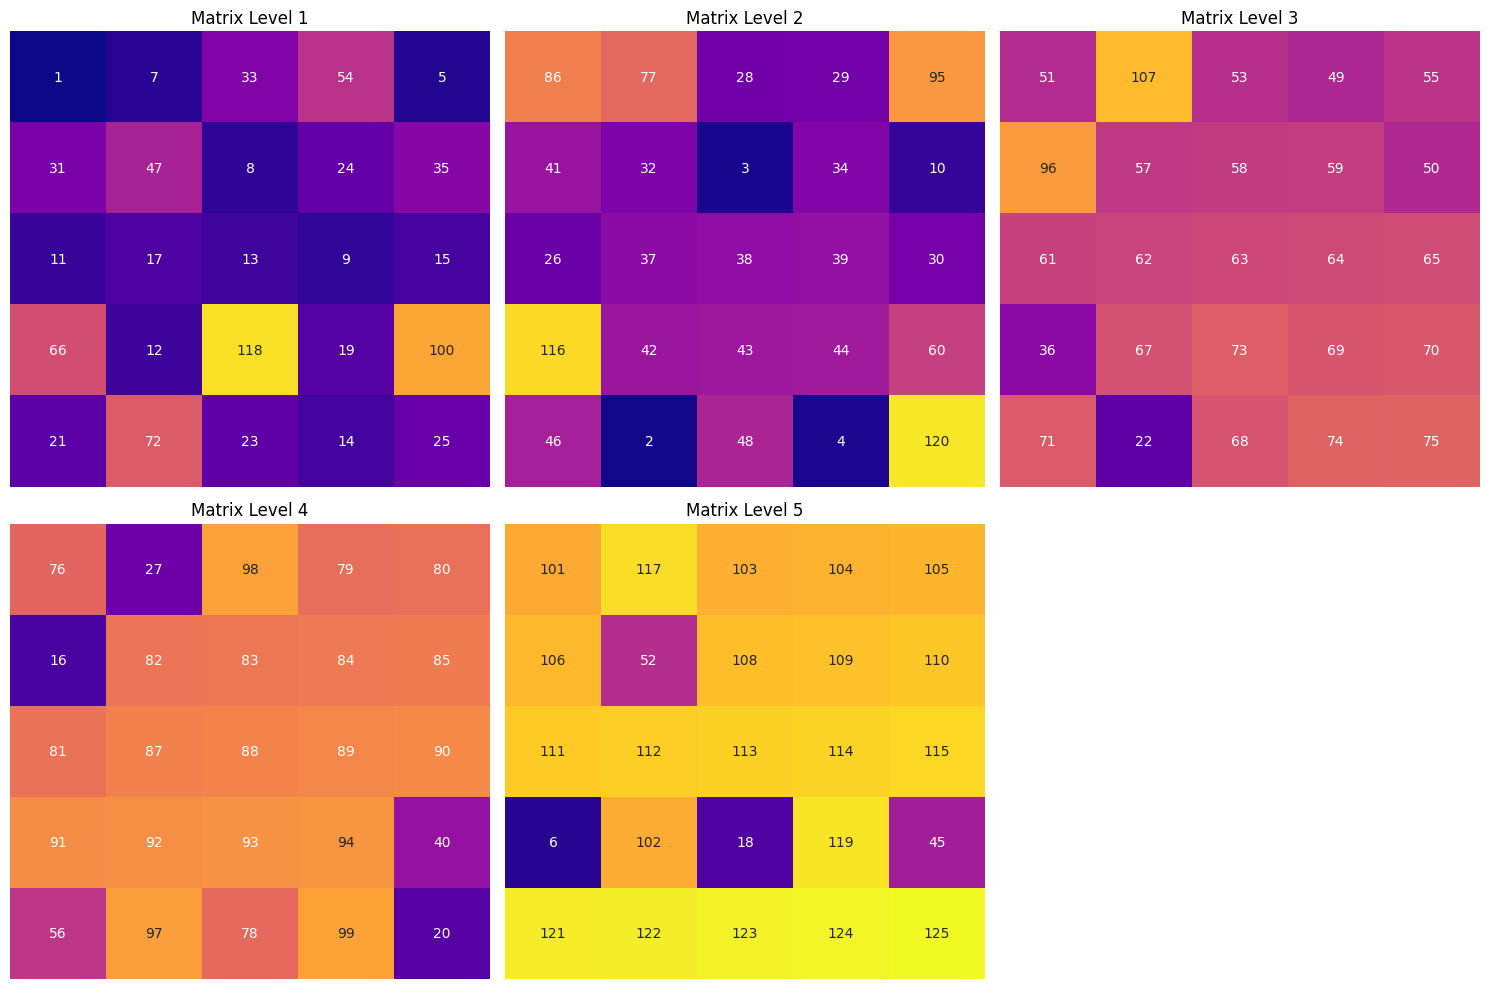

42
Objective Function Value:  44


In [21]:
displayMatrixLayers(cubes_tiap_percobaan[0][-1].to_3d_array())
print(len(cubes_tiap_percobaan[0]))
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 2.1.3. Objective Function Value Plot on Each Iteration

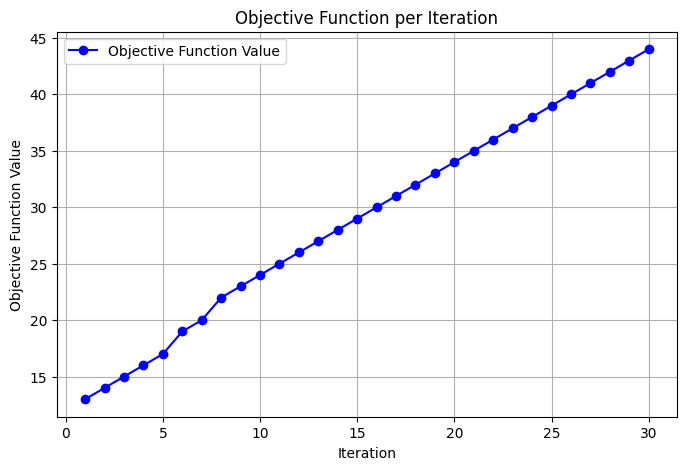

In [22]:
displayPlotValuePerIteration(values_each_experiment[0])

### 2.2. Second Experiment Result

In [23]:
print("Total iteration: ", iteration_each_experiment[1])
print("Execution time: ", exec_time_each_experiment[1])

Total iteration:  28
Execution time:  54.4765716670081


#### 2.2.1. Initial State

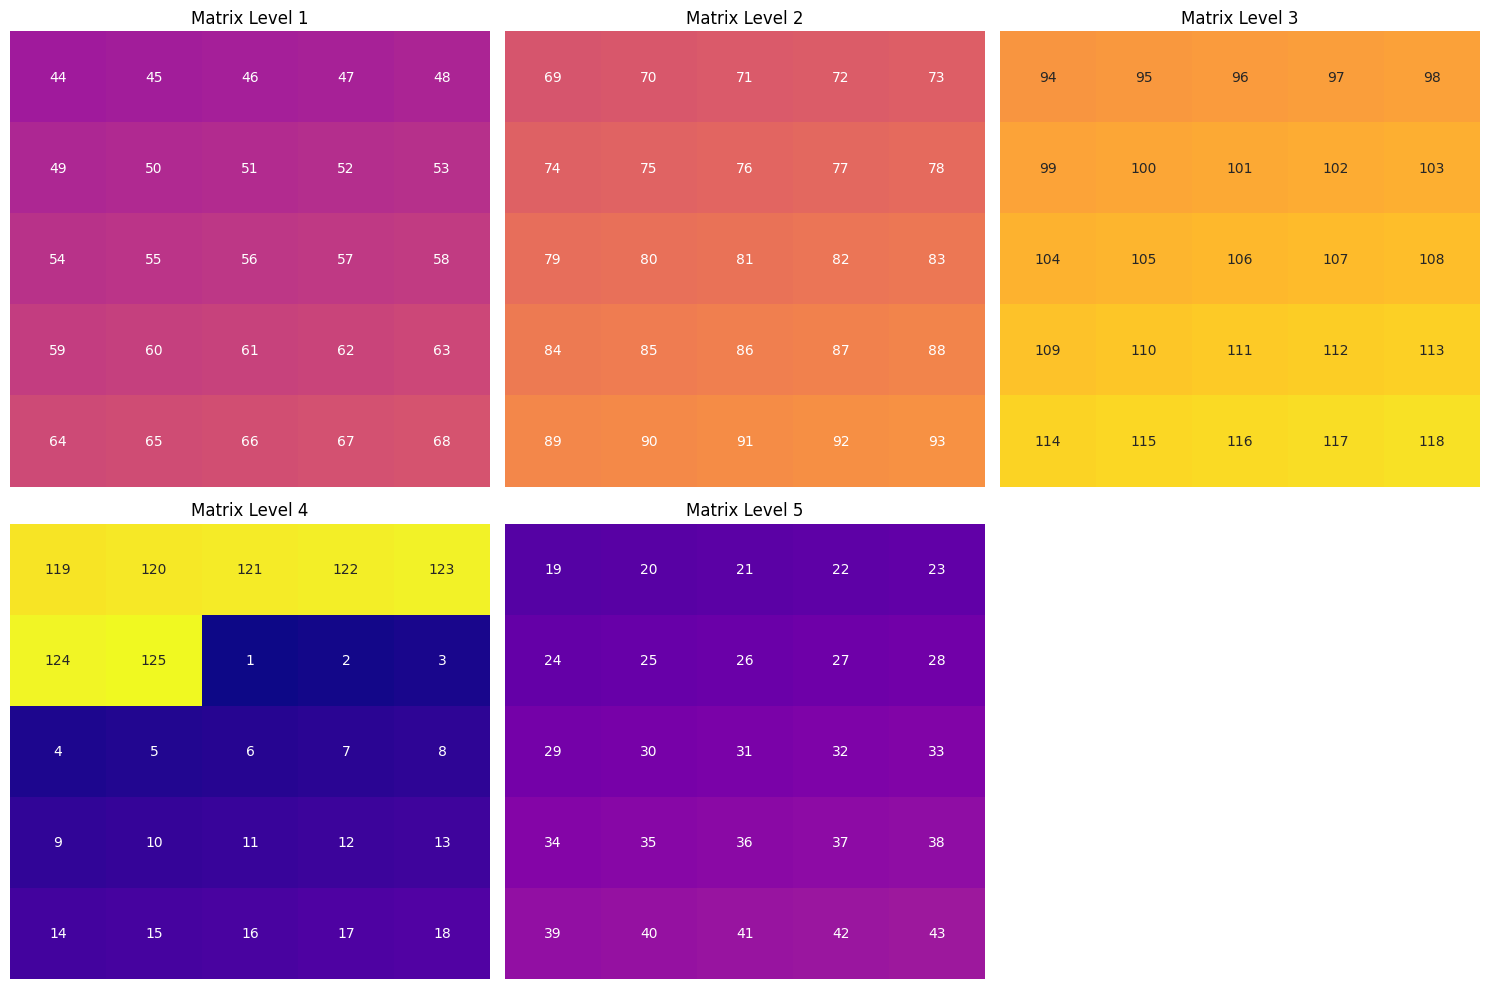

Objective Function Value:  1


In [25]:
displayMatrixLayers(cubes_tiap_percobaan[1][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][0])

#### 2.2.2. Final State

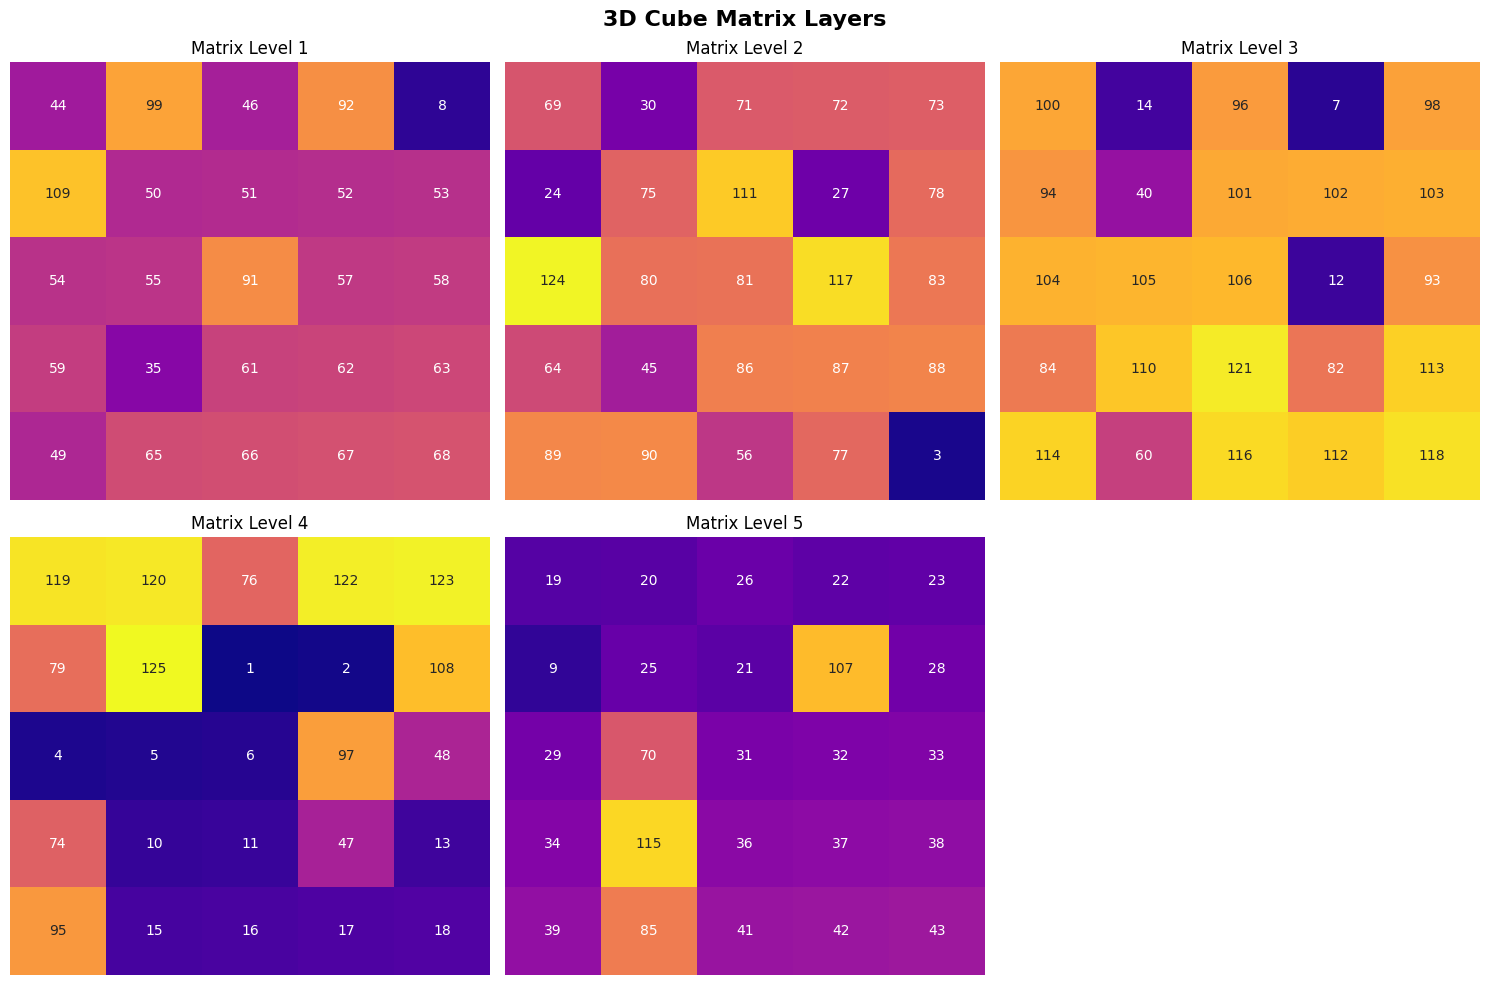

Objective Function Value:  43


In [70]:
displayMatrixLayers(cubes_tiap_percobaan[1][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 2.2.3. Objective Function Value Plot on Each Iteration

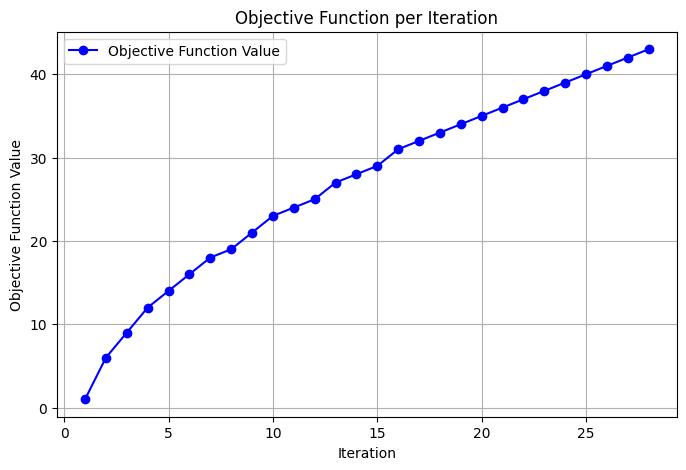

In [27]:
displayPlotValuePerIteration(values_each_experiment[1])

### 2.3. Third Experiment Result

In [29]:
print("Total iteration: ", iteration_each_experiment[2])
print("Execution time: ", exec_time_each_experiment[2])

Total iteration:  25
Execution time:  51.49630166700808


#### 2.3.1. Initial State

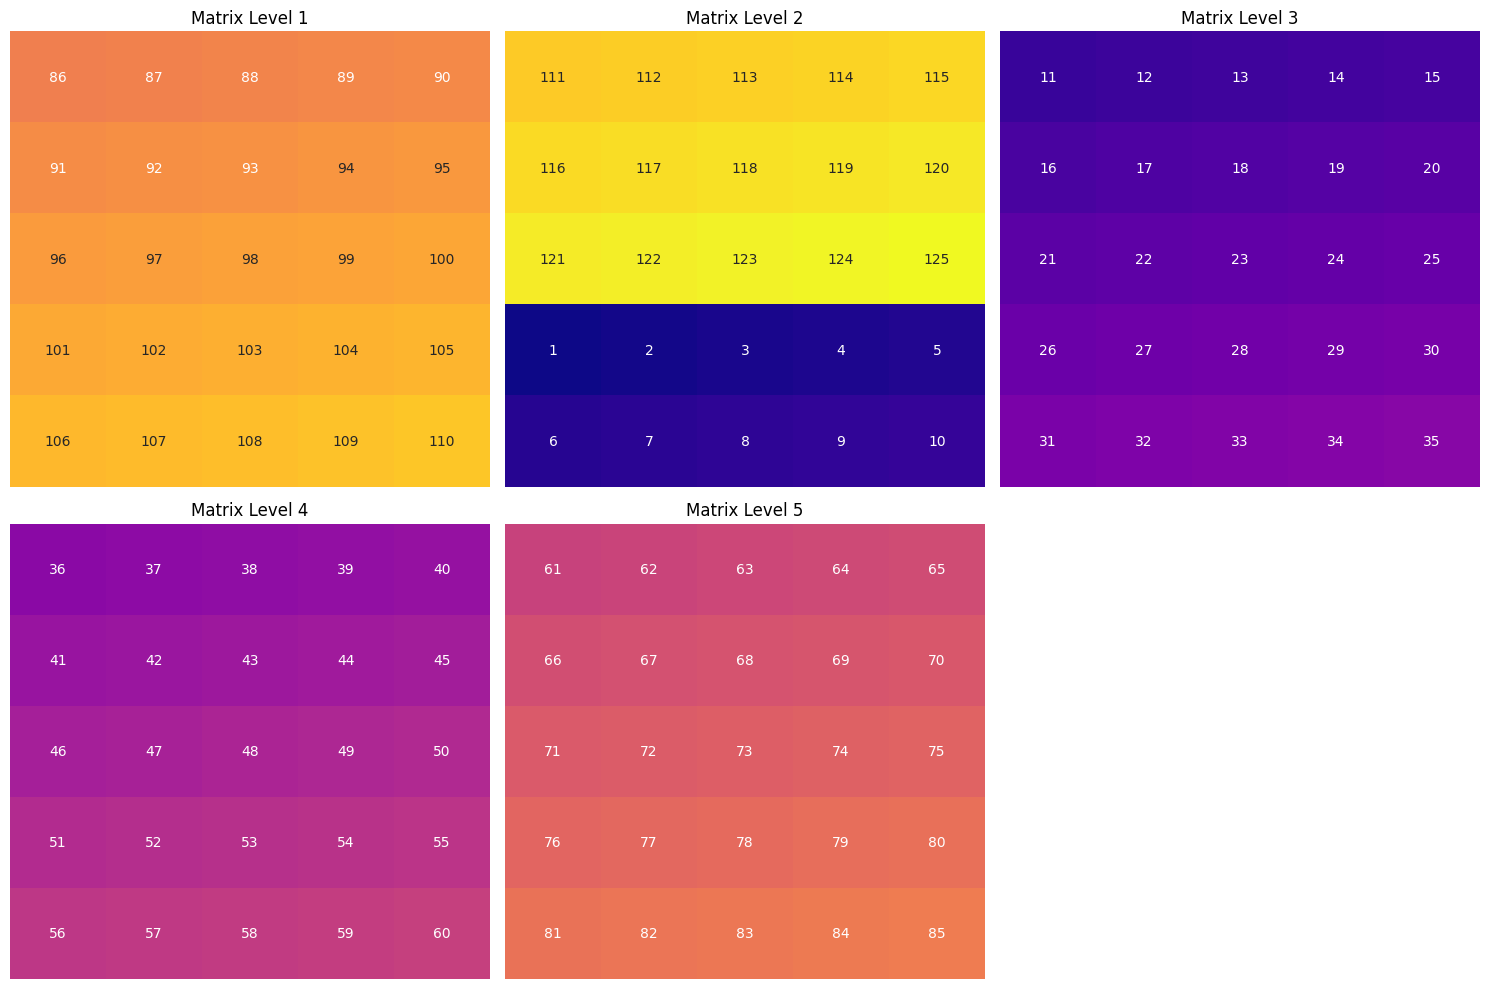

Objective Function Value:  4


In [31]:
displayMatrixLayers(cubes_tiap_percobaan[2][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][0])

#### 2.3.2. Final State

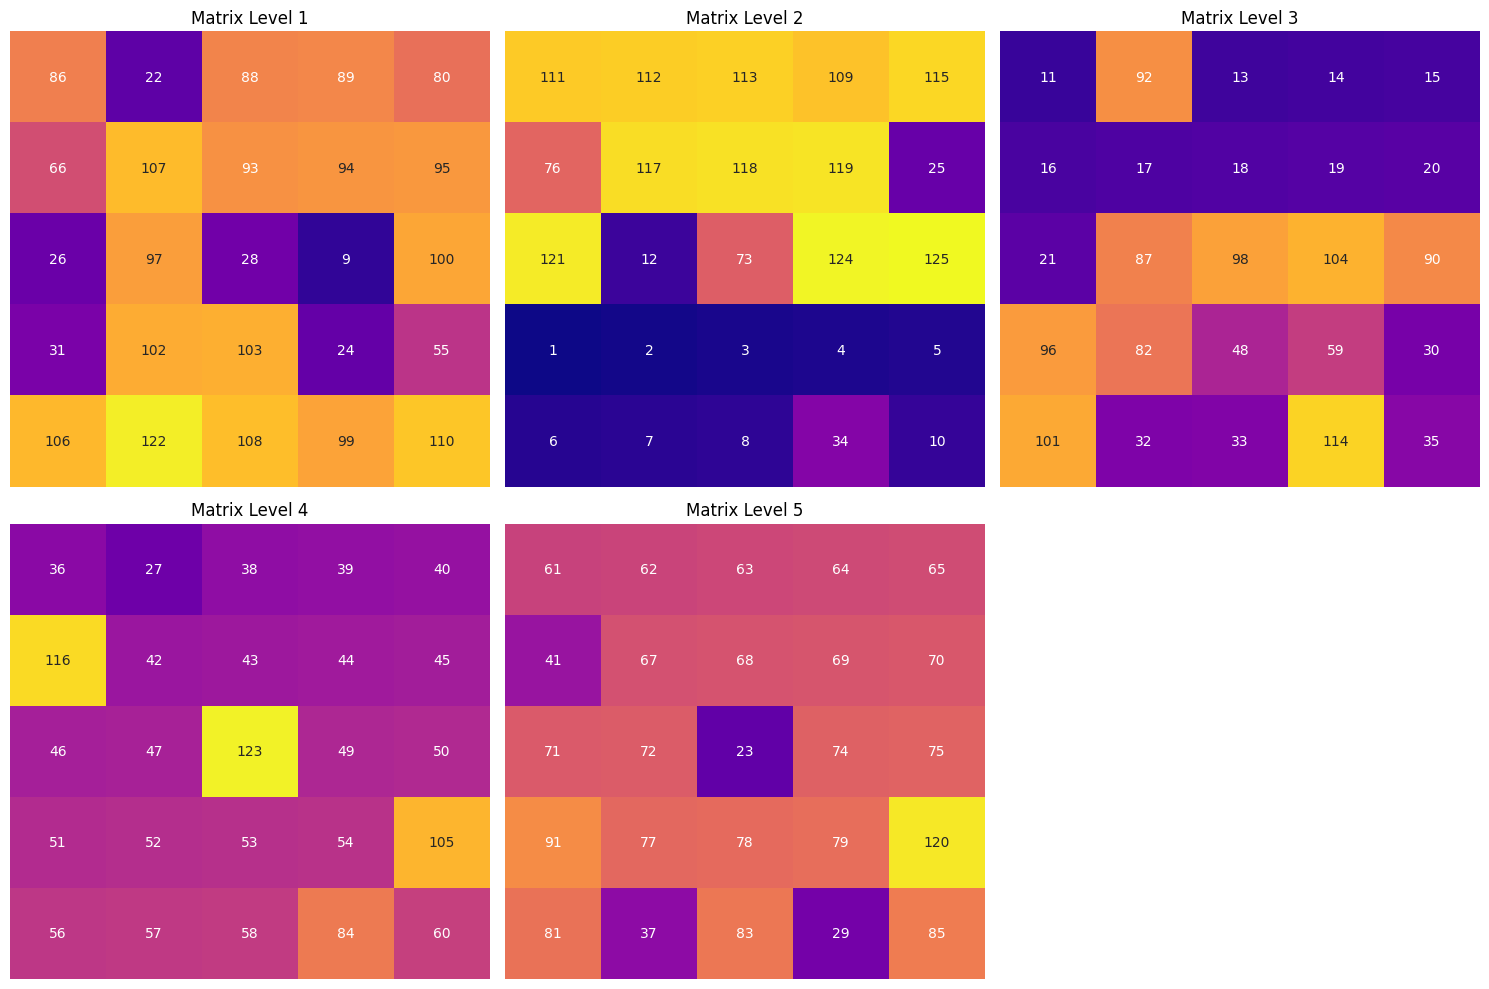

Objective Function Value:  43


In [32]:
displayMatrixLayers(cubes_tiap_percobaan[2][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][-1])

#### 2.3.3. Objective Function Value Plot on Each Iteration

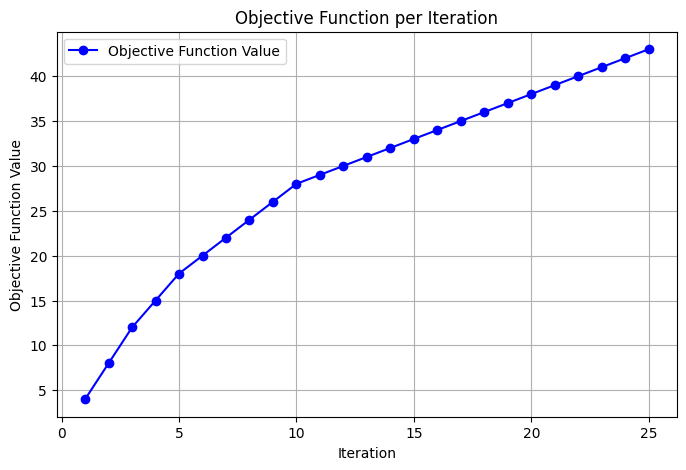

In [33]:
displayPlotValuePerIteration(values_each_experiment[2])

## 3. Random Restart Hill-climbing

### 3.0. Program

In [ ]:
from RandomRestartHillClimbing import RandomRestartHillClimbingCube
param_max_restart = 3
exec_time_each_experiment = []
cubesPerRestart_tiap_percobaan = []
valuesPerRestart_tiap_percobaan = []
iterationPerRestart_tiap_percobaan = []
restart_tiap_percobaan = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes_per_restart, values_per_restart, iteration_per_restart, restart = RandomRestartHillClimbingCube(cube, param_max_restart)
    end_time = time.perf_counter()
    
    exec_time_each_experiment.append(end_time-start_time)
    cubesPerRestart_tiap_percobaan.append(cubes_per_restart)
    valuesPerRestart_tiap_percobaan.append(values_per_restart)
    iterationPerRestart_tiap_percobaan.append(iteration_per_restart)
    restart_tiap_percobaan.append(restart)

Current val:  13
Current val:  14
Current val:  15
Current val:  16
Current val:  17
Current val:  19
Current val:  20
Current val:  22
Current val:  23
Current val:  24
Current val:  25
Current val:  26
Current val:  27
Current val:  28
Current val:  29
Current val:  30
Current val:  31
Current val:  32
Current val:  33
Current val:  34
Current val:  35
Current val:  36
Current val:  37
Current val:  38
Current val:  39
Current val:  40
Current val:  41
Current val:  42
Current val:  43
Current val:  44
Best value at restart 0 = 44
Current val:  0
Current val:  2
Current val:  4
Current val:  6
Current val:  8
Current val:  10
Current val:  11
Current val:  13
Current val:  14
Current val:  15
Current val:  16
Current val:  17
Current val:  19
Current val:  20
Current val:  21
Current val:  22
Current val:  23
Current val:  24
Current val:  25
Current val:  26
Current val:  27
Current val:  28
Current val:  29
Current val:  30
Current val:  31
Current val:  32
Current val:  33
Current

### 3.1. First Experiment Result

Execution time:  172.0003900419979


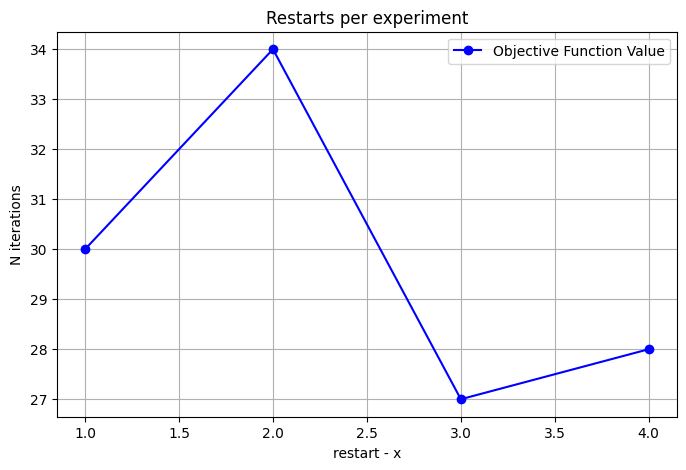

In [57]:
print("Execution time: ", exec_time_each_experiment[0])

displayPlotRestartPerExperiment(iterationPerRestart_tiap_percobaan[0])

#### 3.1.1. Initial State

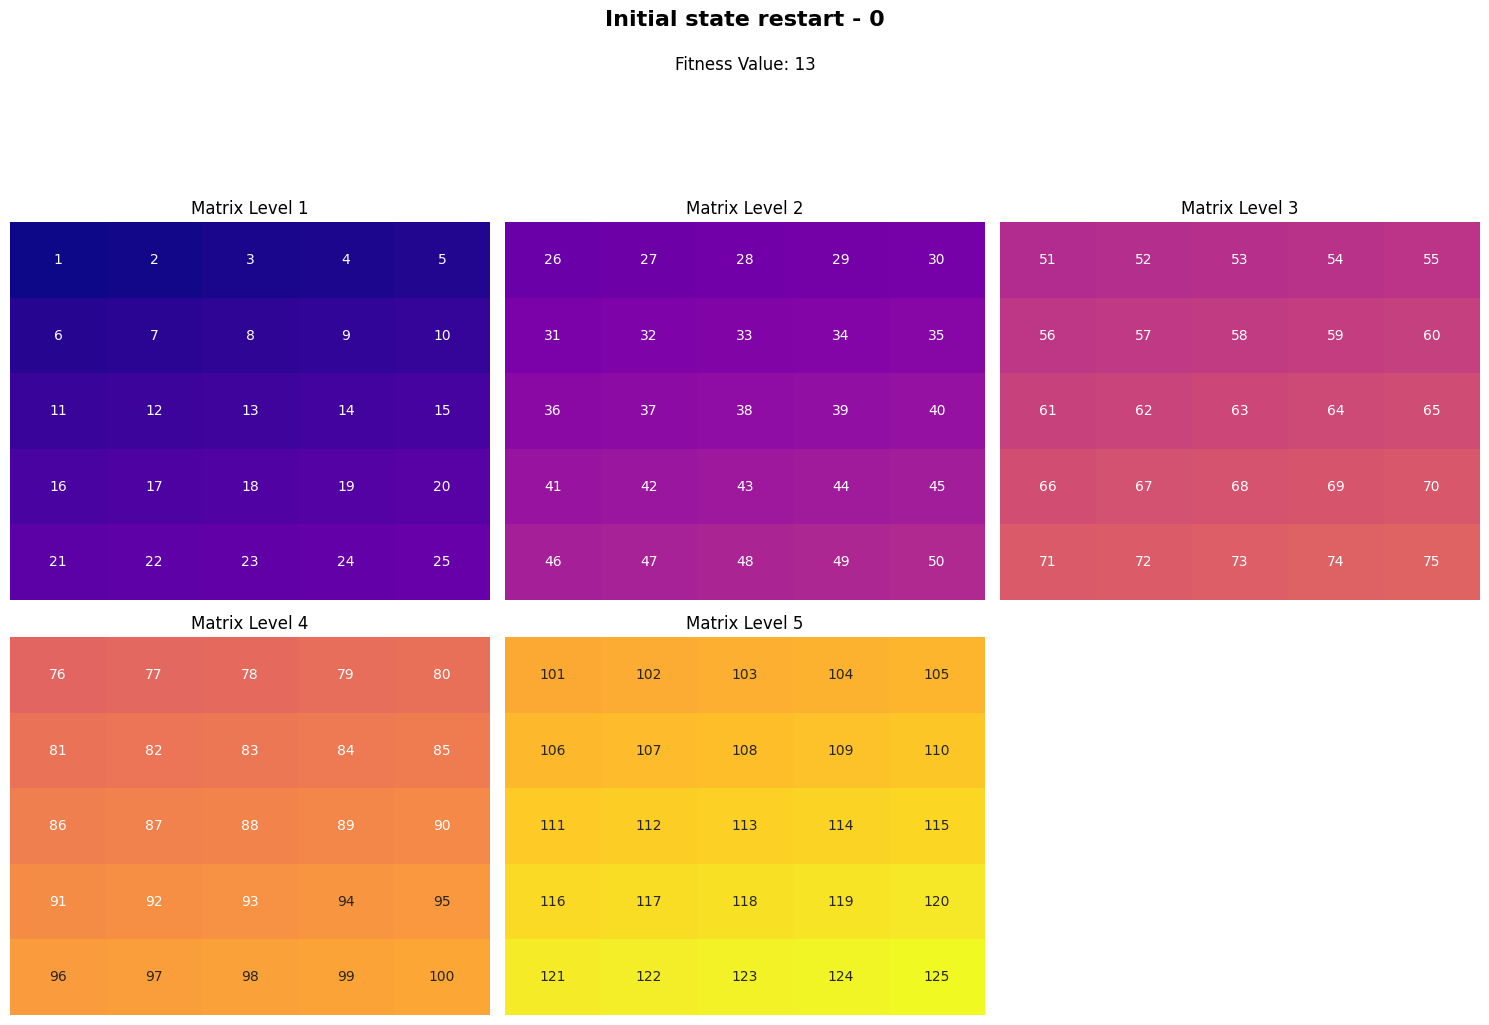

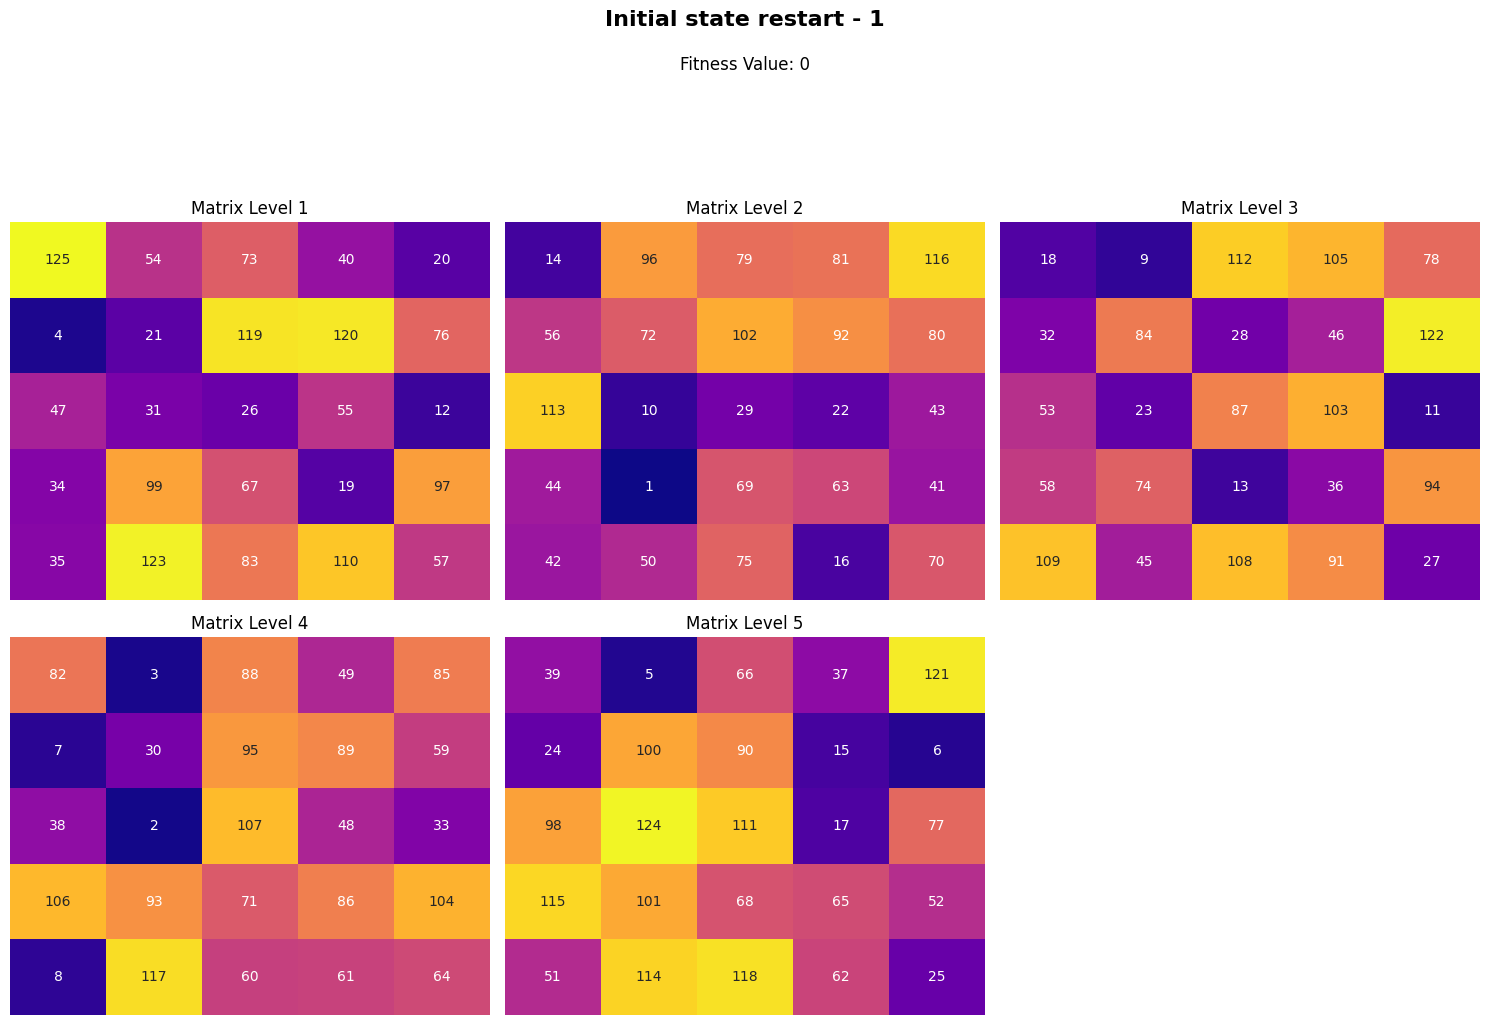

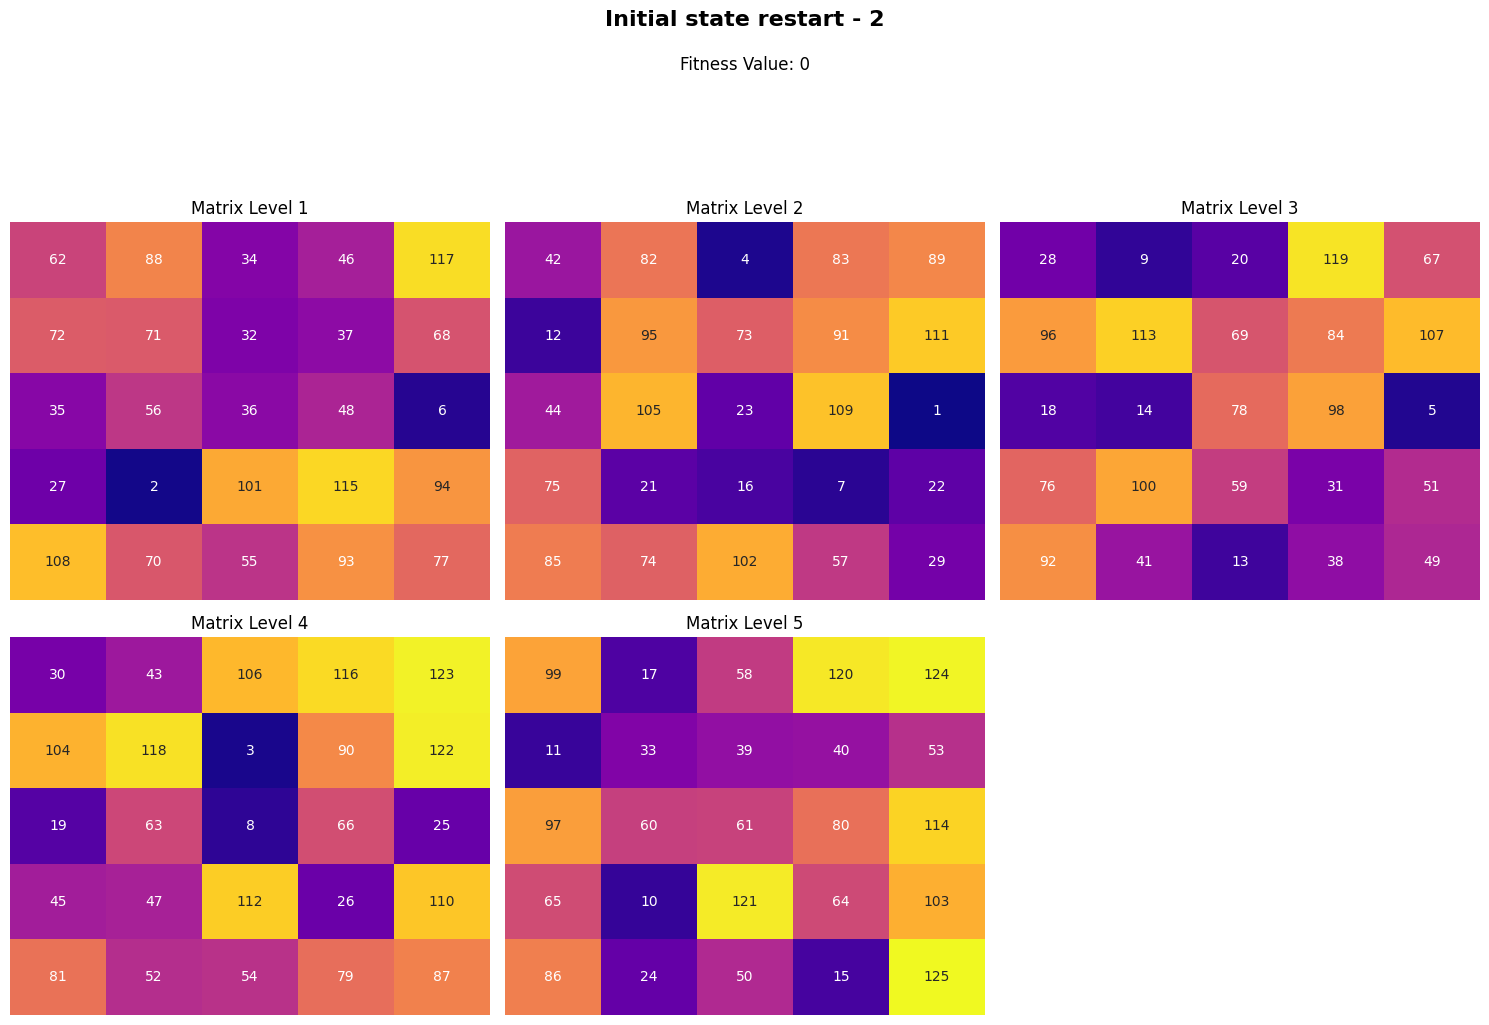

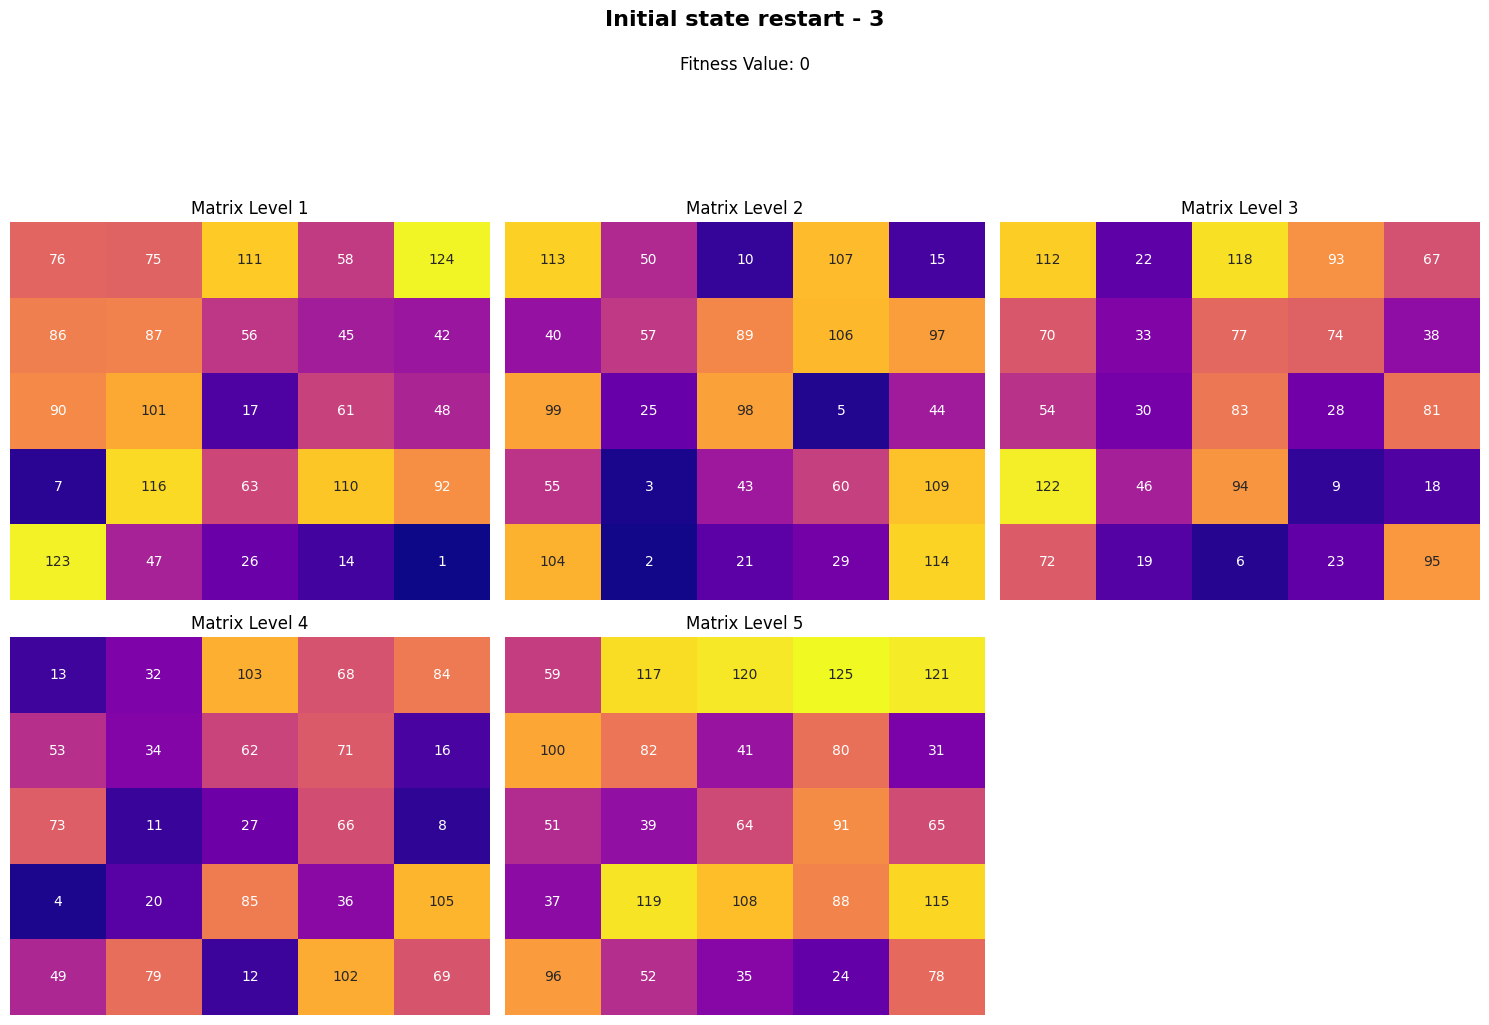

In [103]:

for index, cubesEachRestart in enumerate(cubesPerRestart_tiap_percobaan[0]):
    displayMatrixLayers(cubesEachRestart[0].to_3d_array(), f"Initial state restart - {index}", valuesPerRestart_tiap_percobaan[0][index][0])

#### 3.1.2. Final State

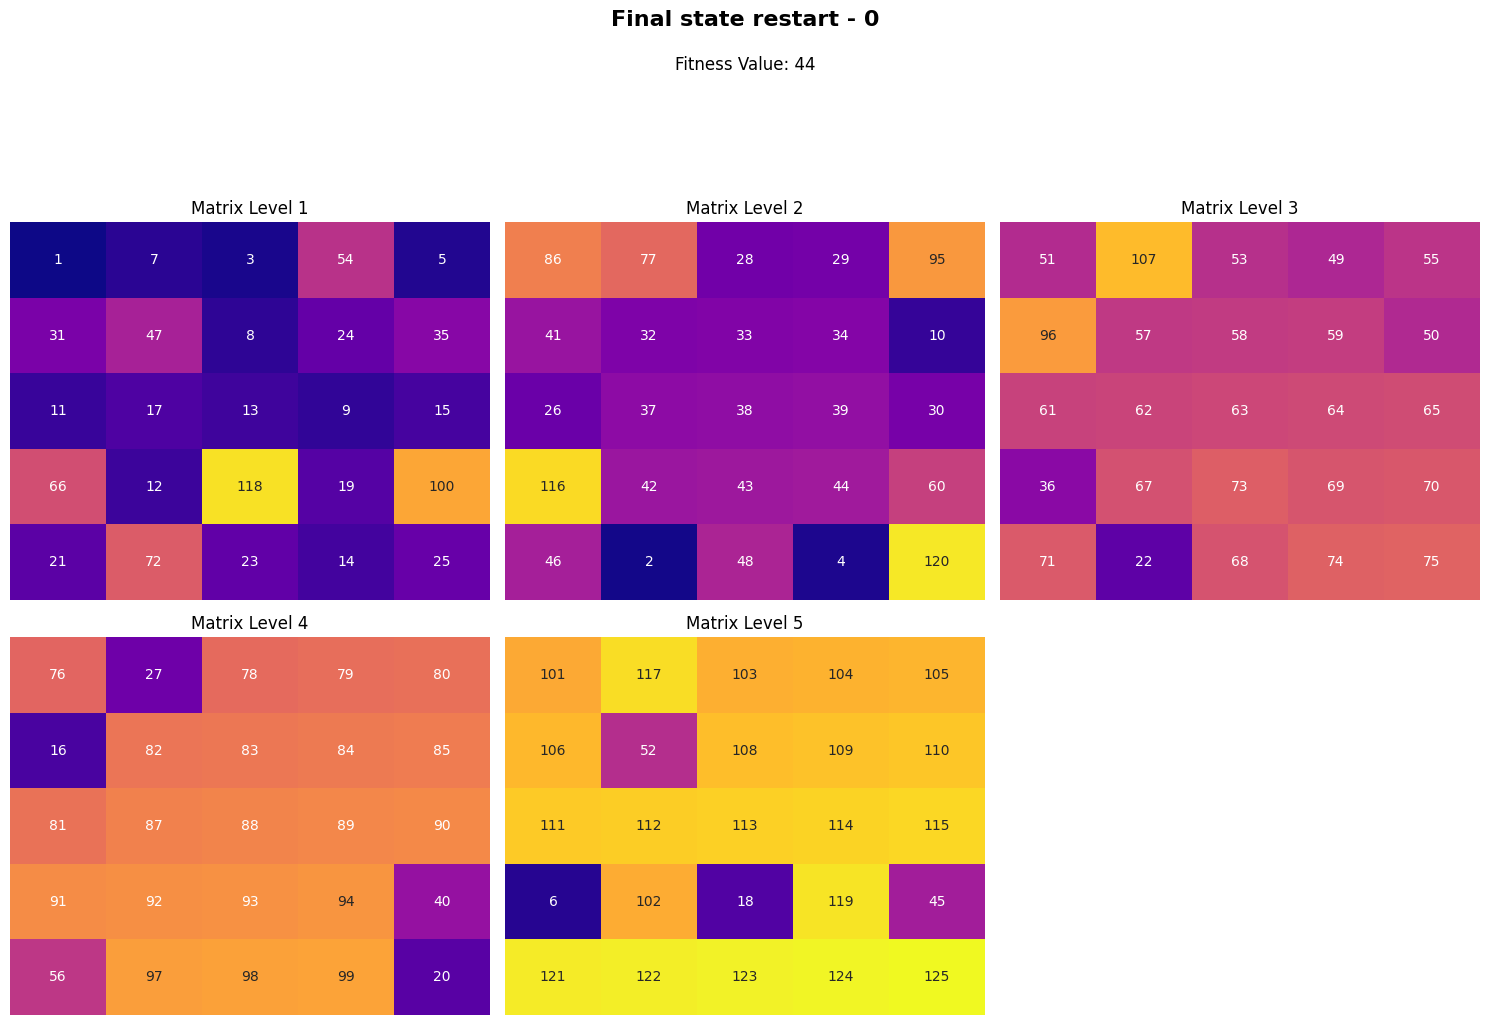

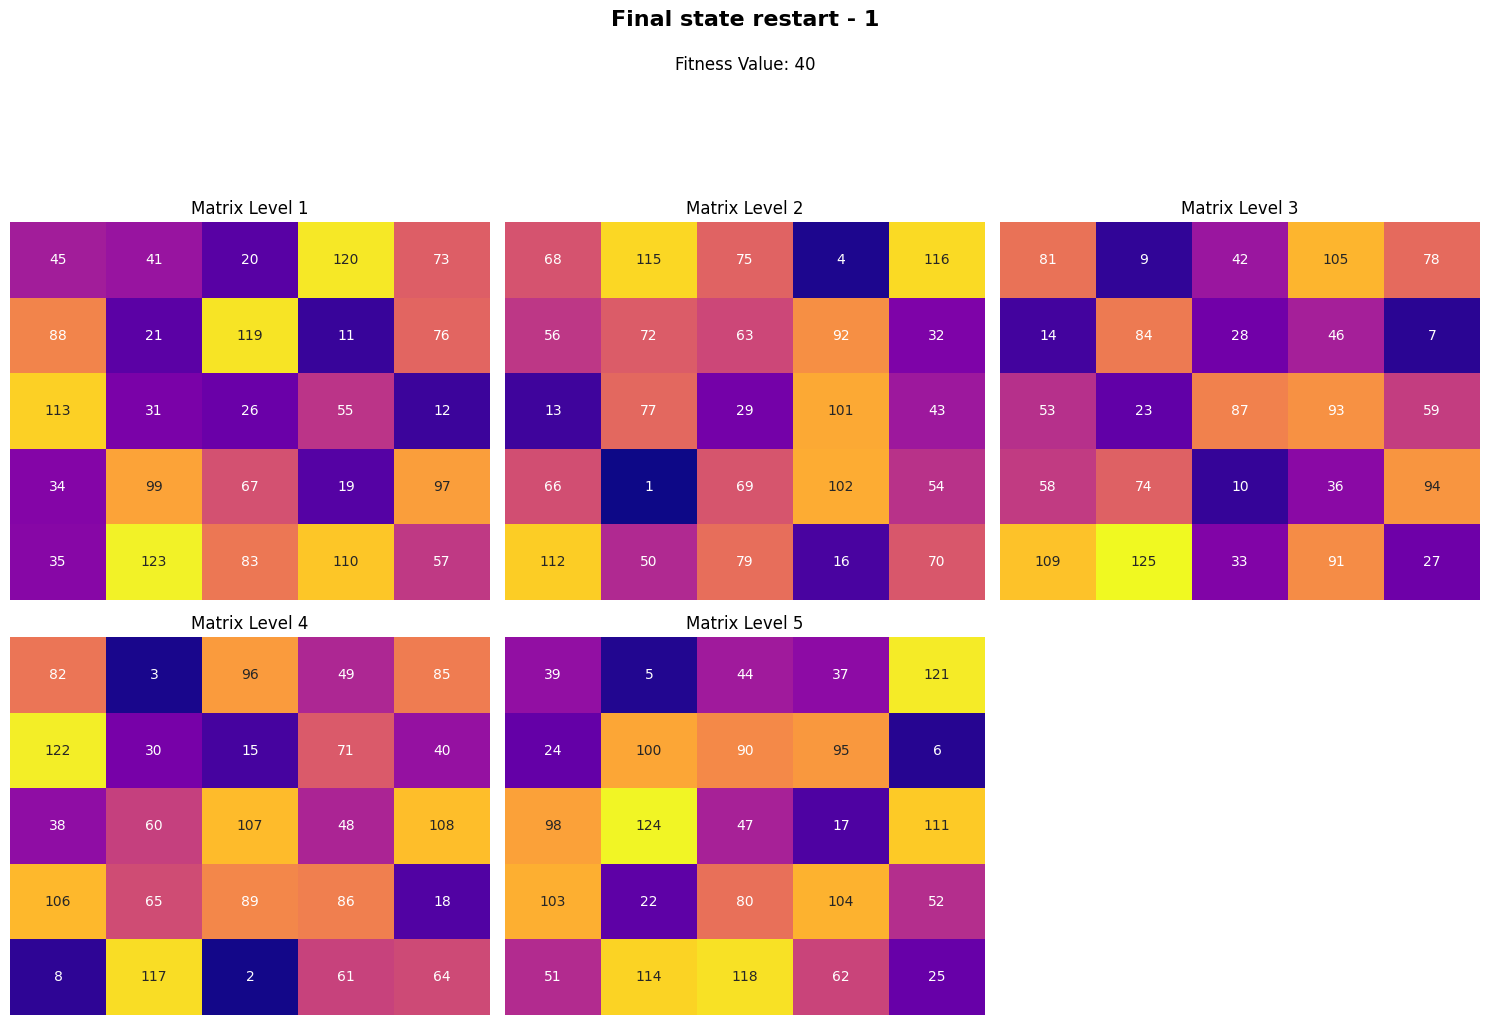

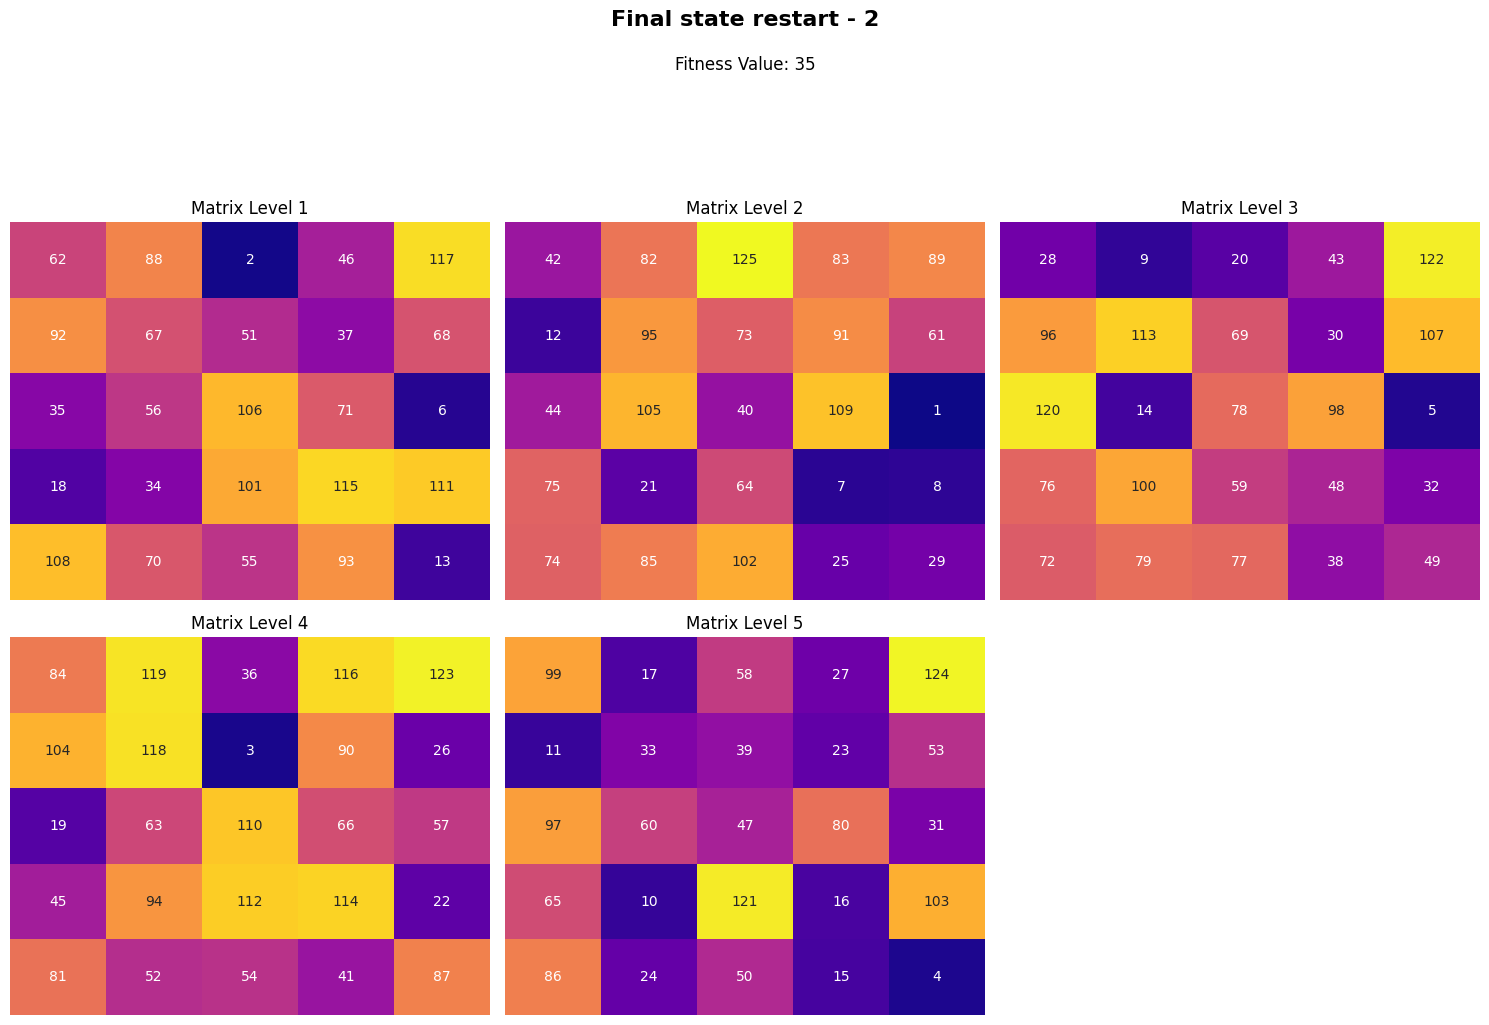

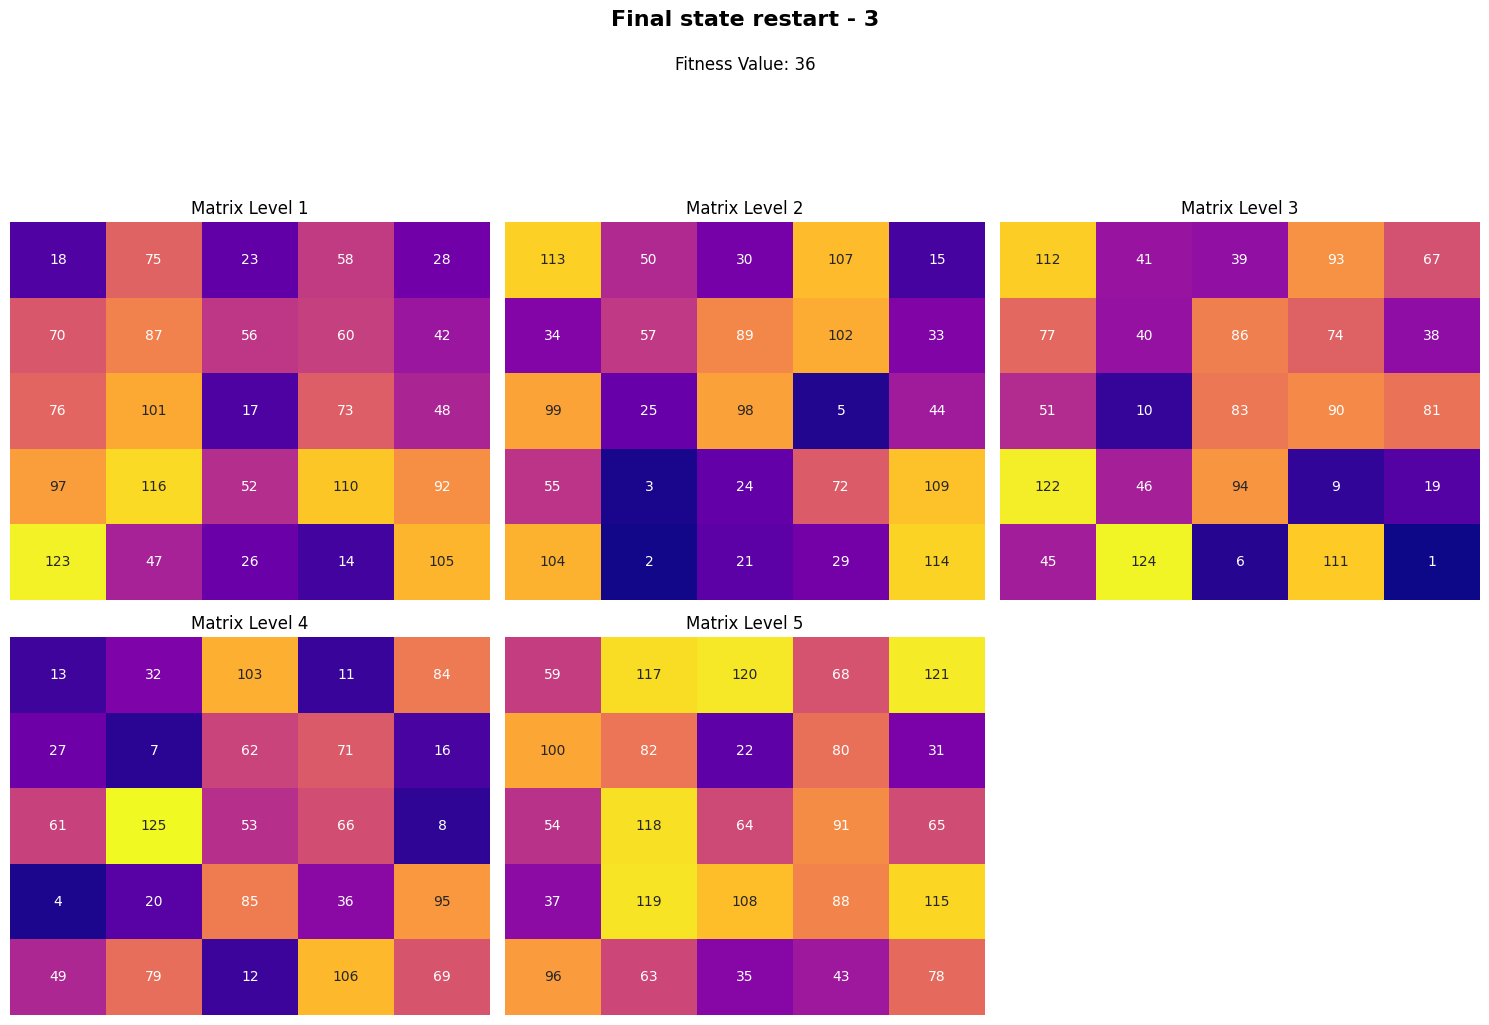

In [104]:
for index, cubesEachRestart in enumerate(cubesPerRestart_tiap_percobaan[0]):
    displayMatrixLayers(cubesEachRestart[-1].to_3d_array(), f"Final state restart - {index}", valuesPerRestart_tiap_percobaan[0][index][-1])

#### 3.1.3. Objective Function Value Plot on Each Iteration

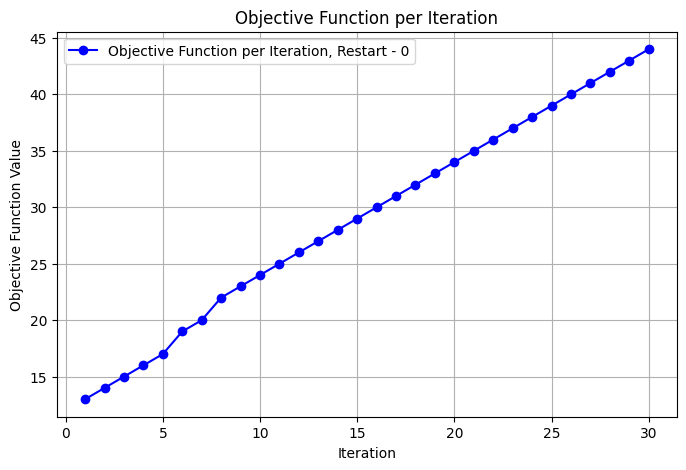

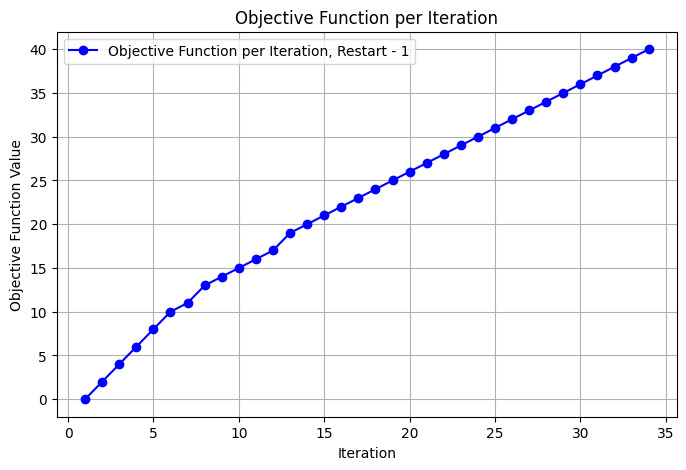

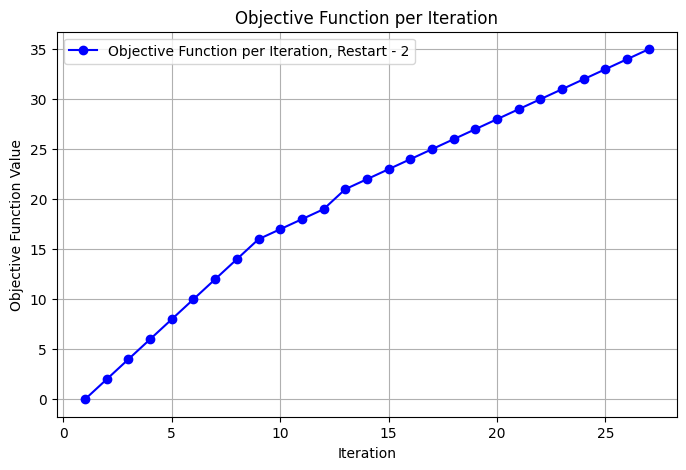

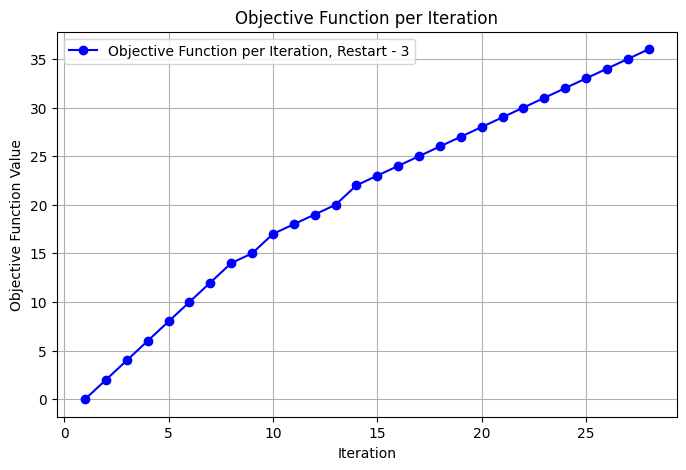

In [97]:
for index,valuePerRestartExperiment in enumerate(valuesPerRestart_tiap_percobaan[0]):
    displayPlotValuePerIteration(valuePerRestartExperiment, f'Objective Function per Iteration, Restart - {index}')

### 3.2. Second Experiment Result

Execution time:  174.81598016698263


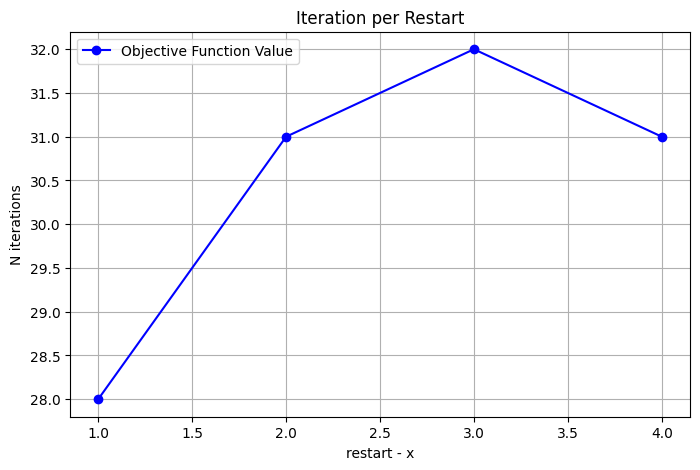

In [98]:
print("Execution time: ", exec_time_each_experiment[1])

displayPlotRestartPerExperiment(iterationPerRestart_tiap_percobaan[1])

#### 3.2.1. Initial State

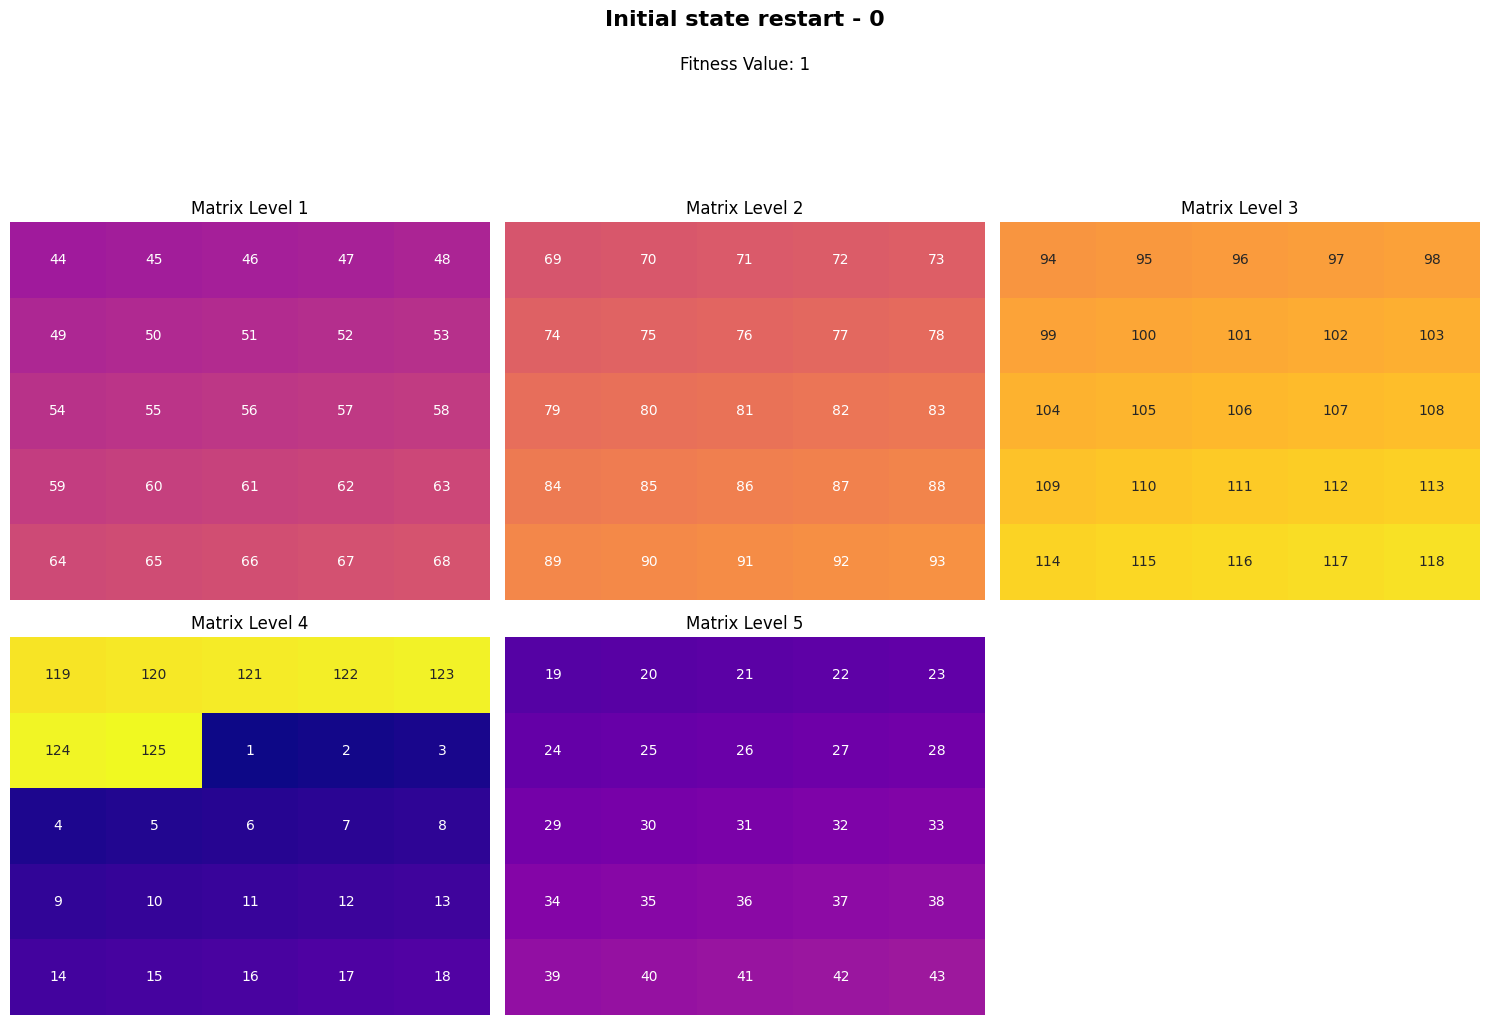

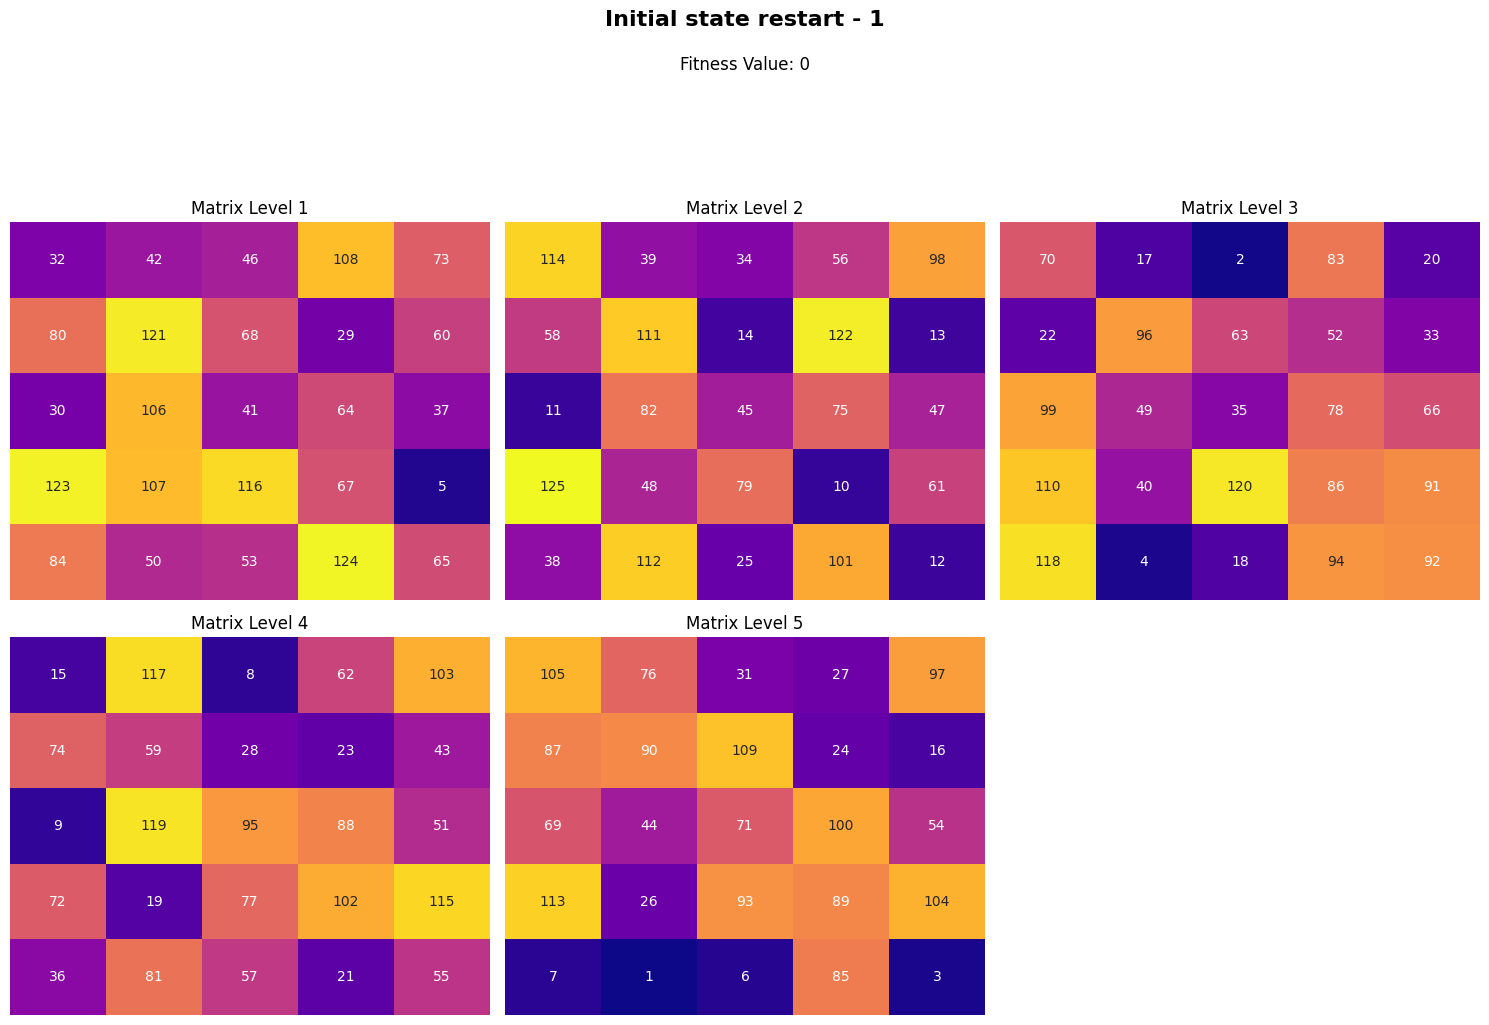

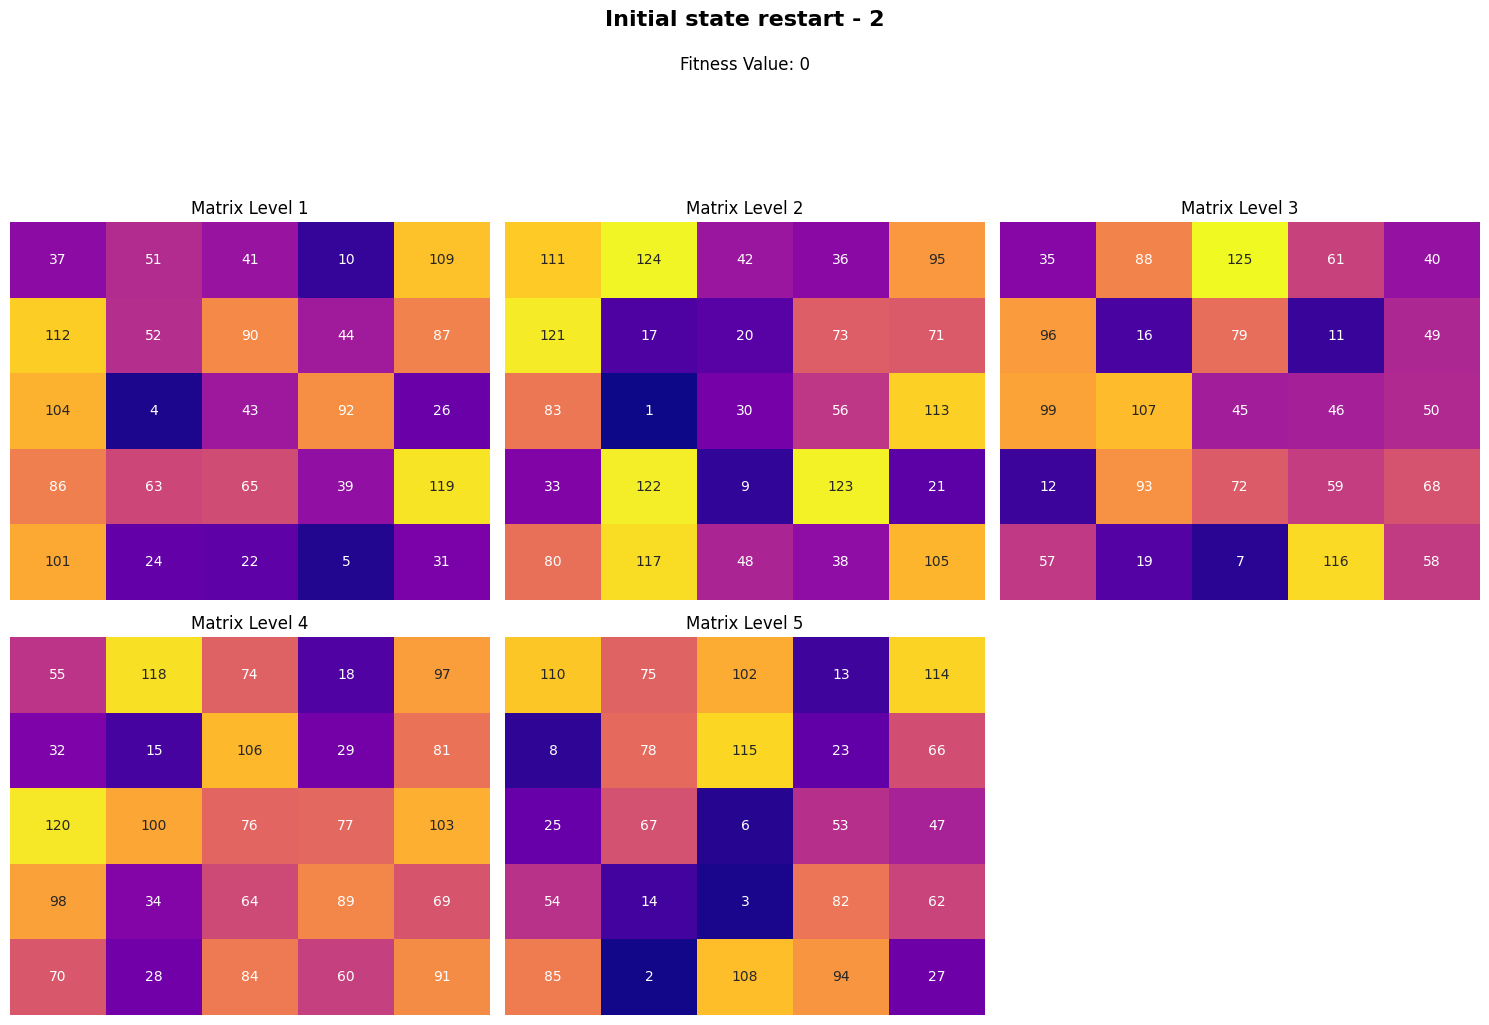

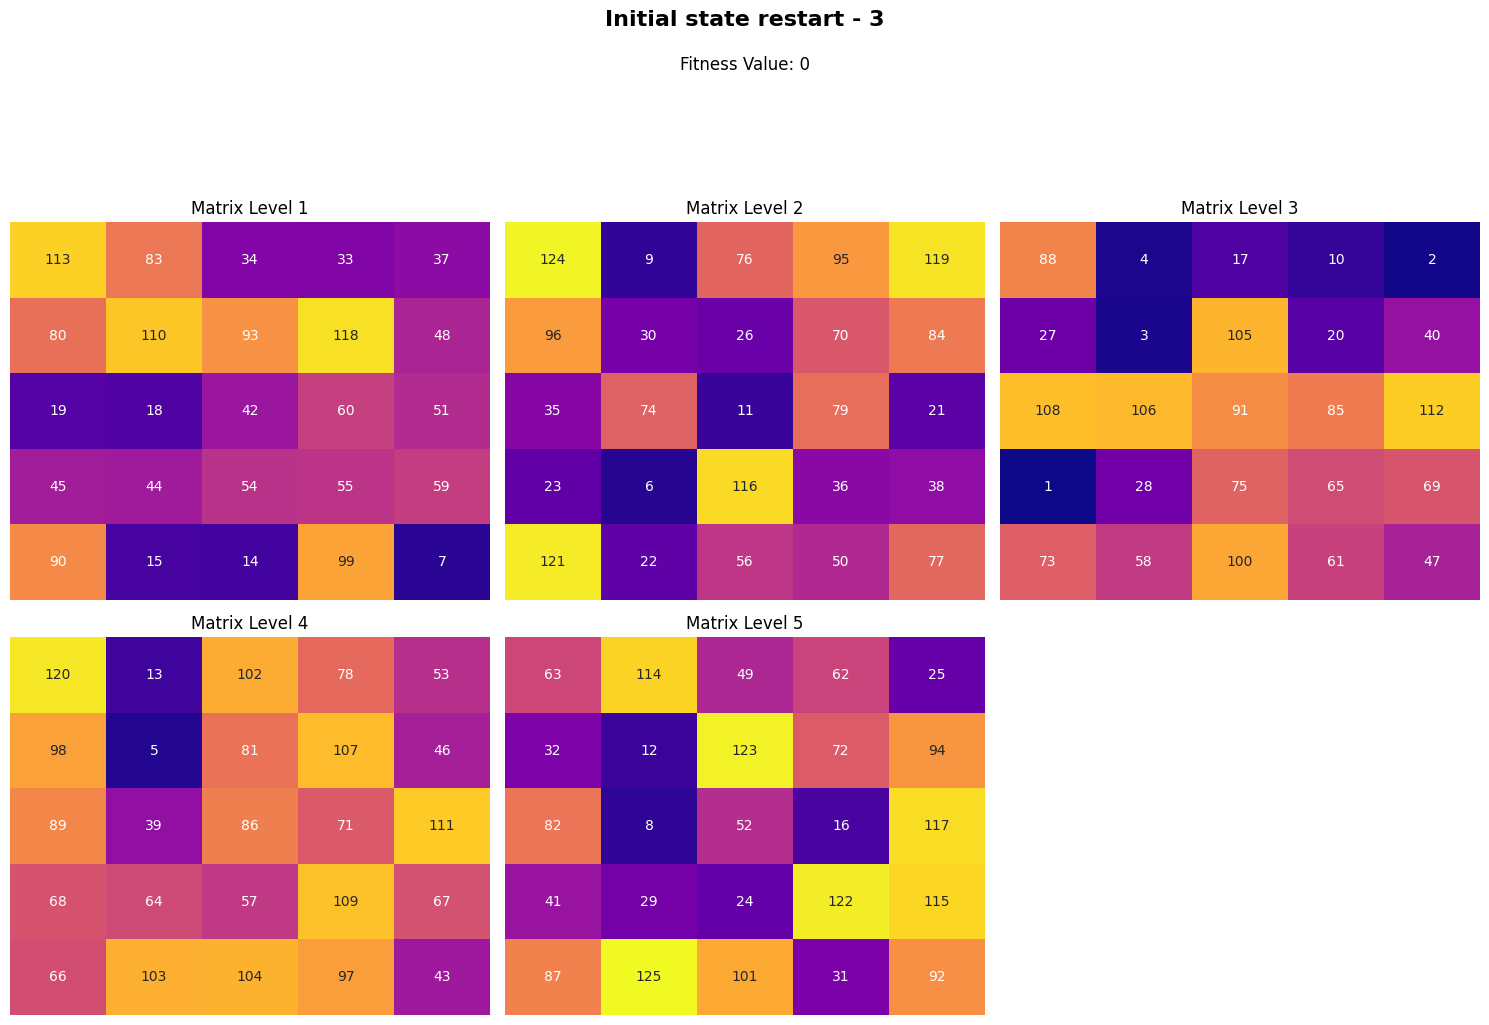

In [105]:
for index, cubesEachRestart in enumerate(cubesPerRestart_tiap_percobaan[1]):
    displayMatrixLayers(cubesEachRestart[0].to_3d_array(), f"Initial state restart - {index}", valuesPerRestart_tiap_percobaan[1][index][0])

#### 3.2.2. Final State

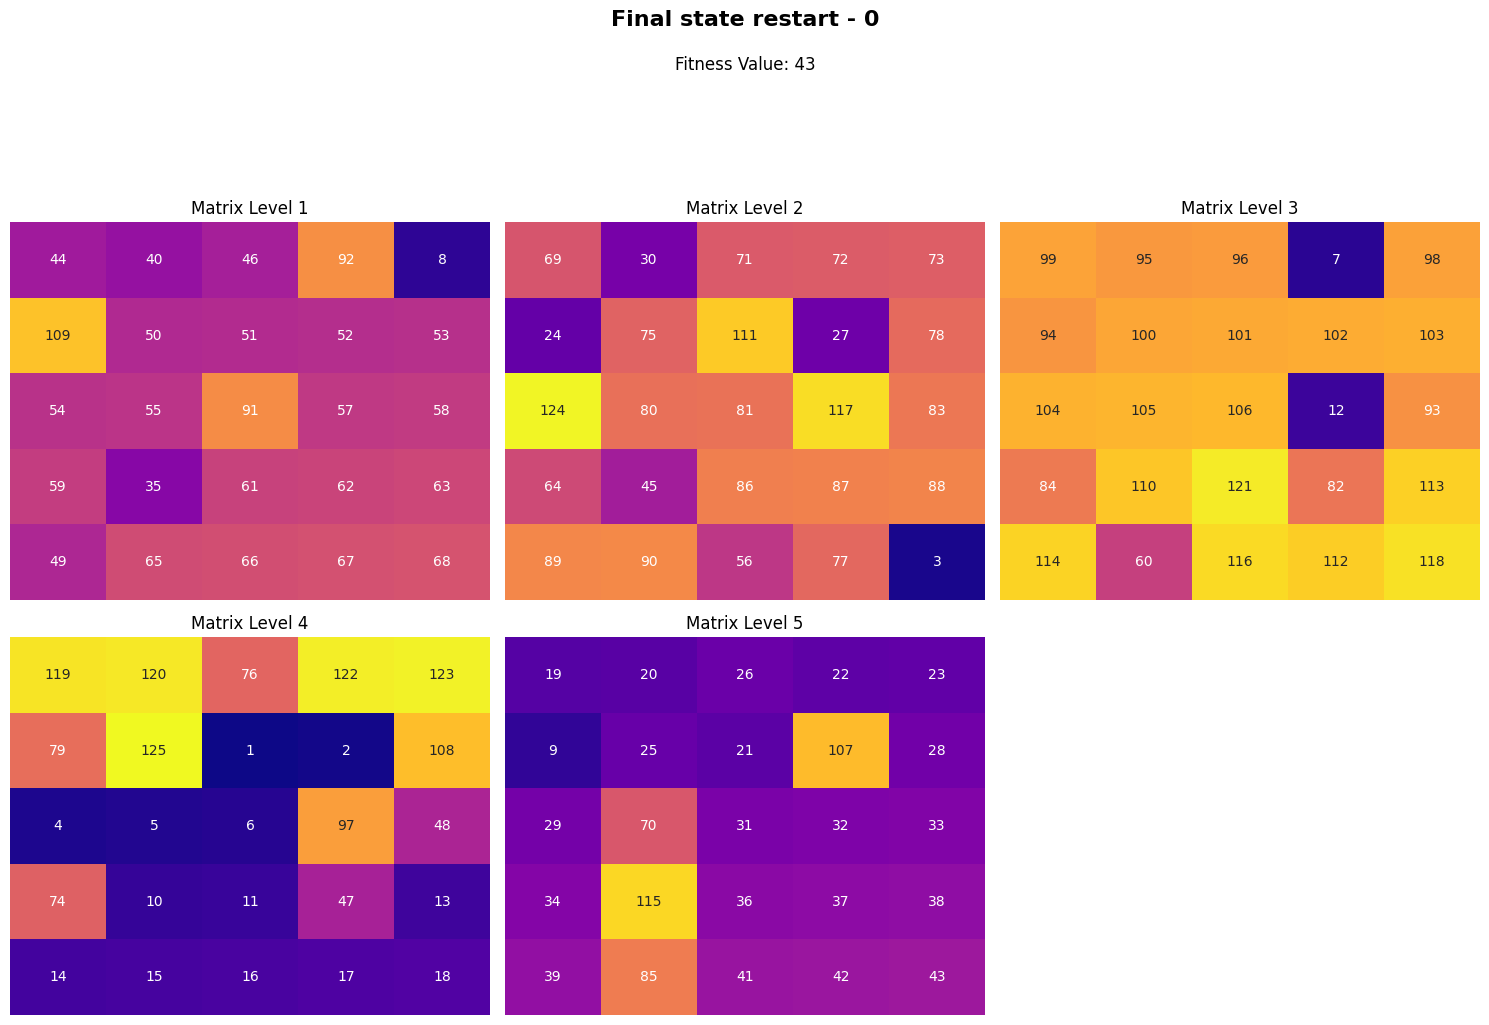

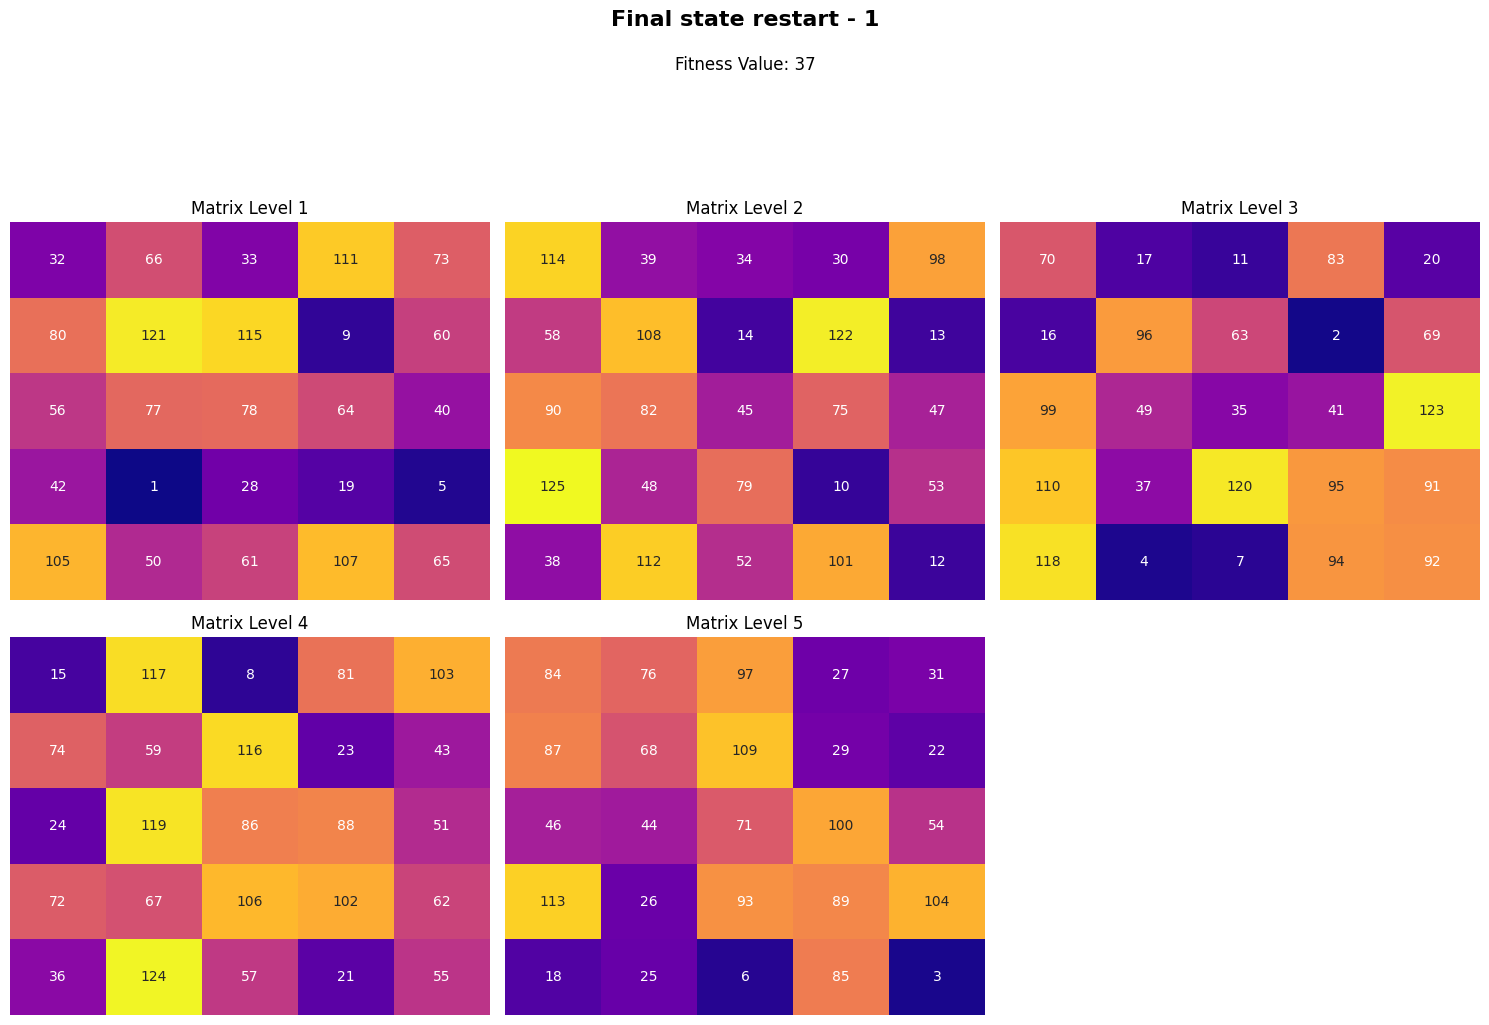

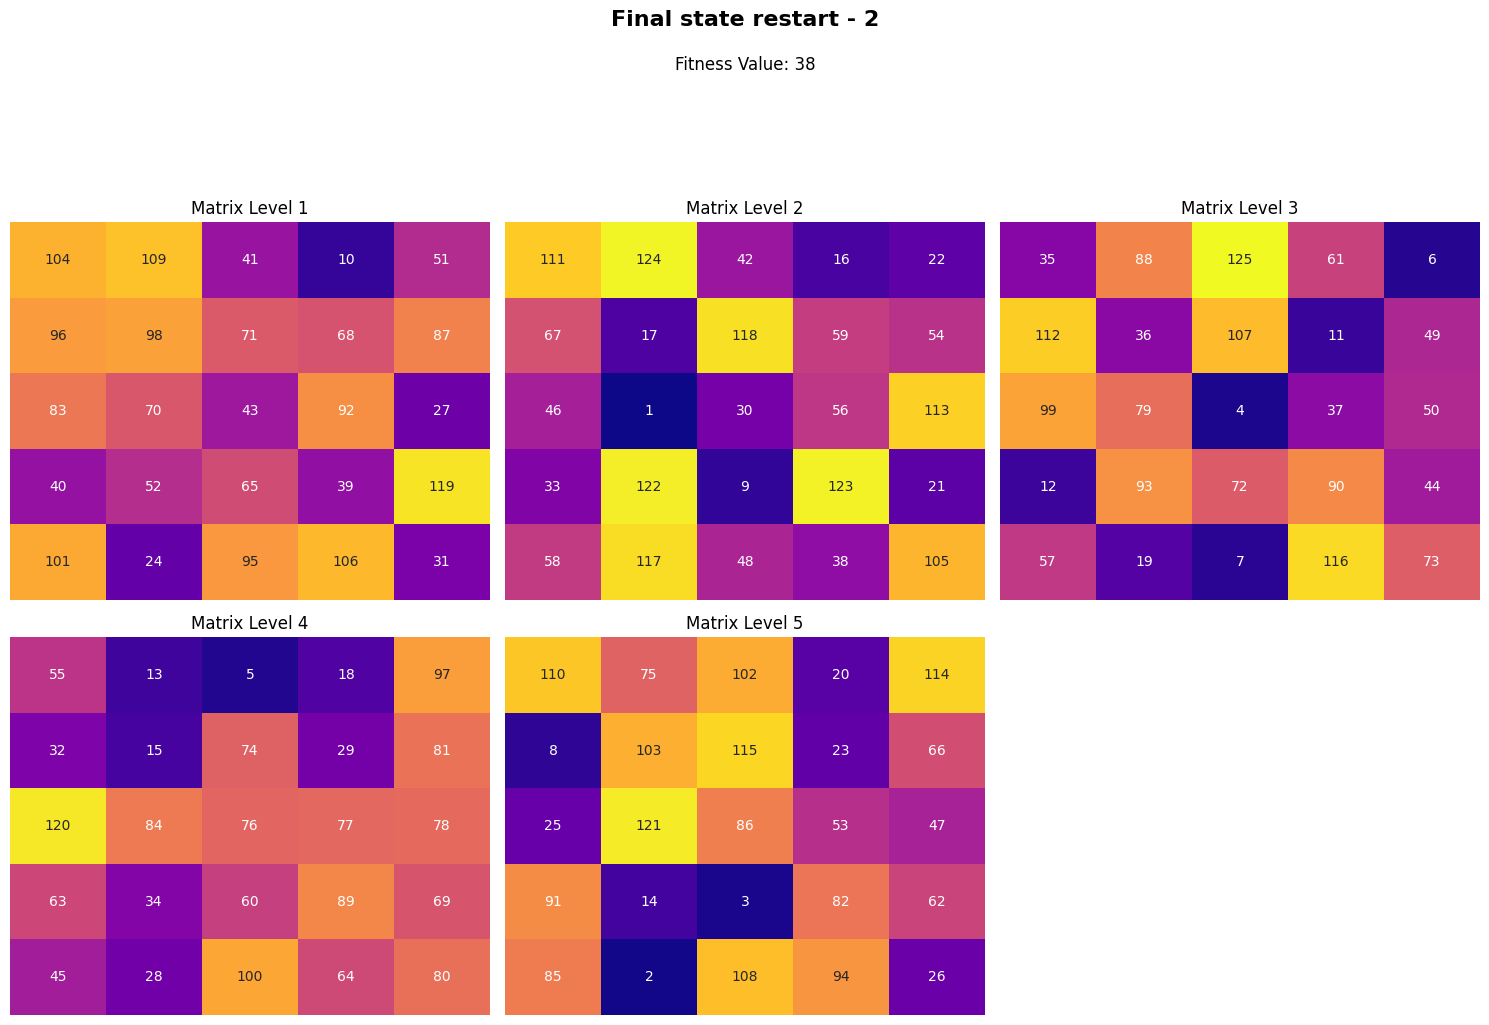

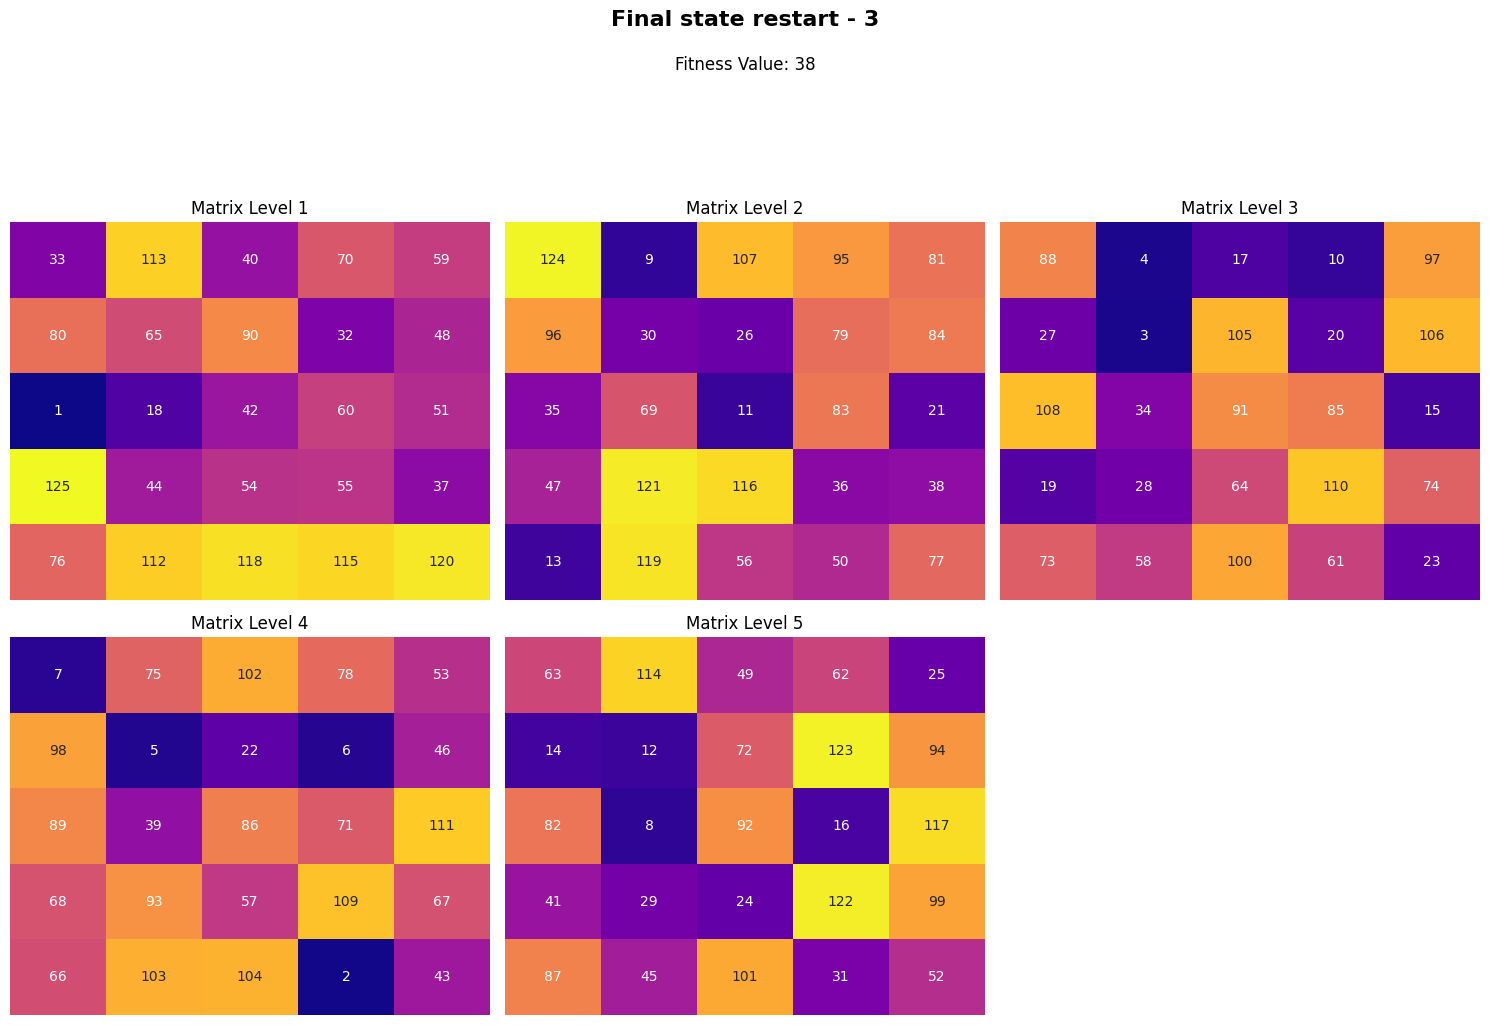

In [106]:
for index, cubesEachRestart in enumerate(cubesPerRestart_tiap_percobaan[1]):
    displayMatrixLayers(cubesEachRestart[-1].to_3d_array(), f"Final state restart - {index}", valuesPerRestart_tiap_percobaan[1][index][-1])

#### 3.2.3. Objective Function Value Plot on Each Iteration

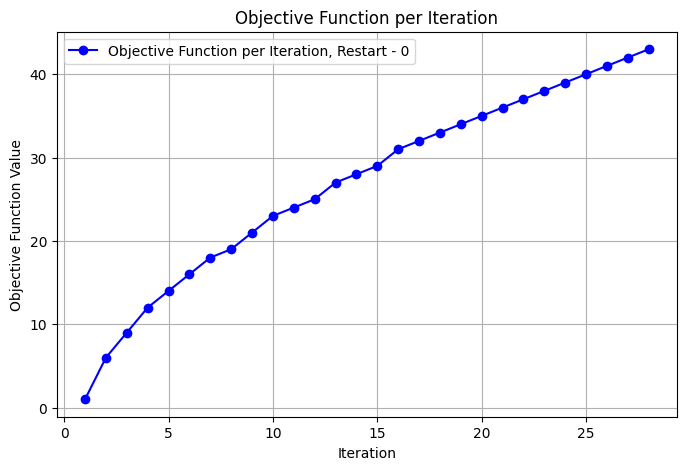

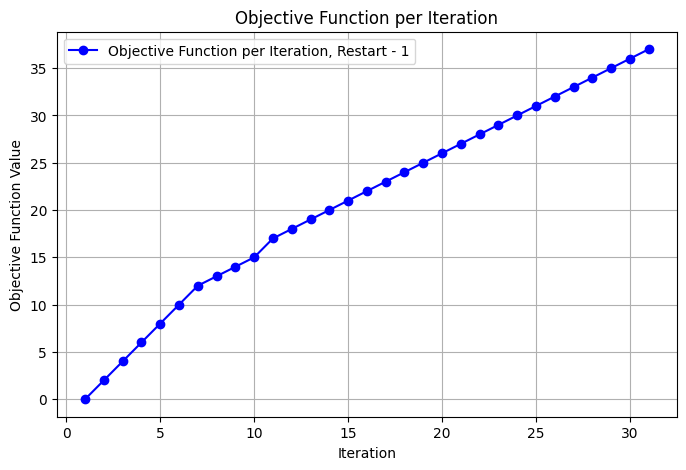

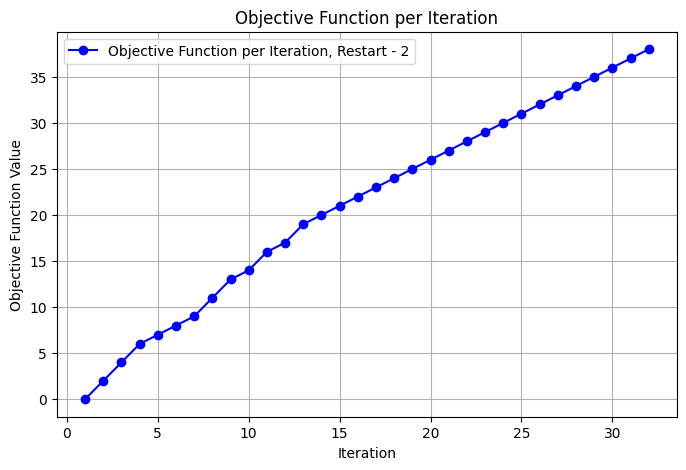

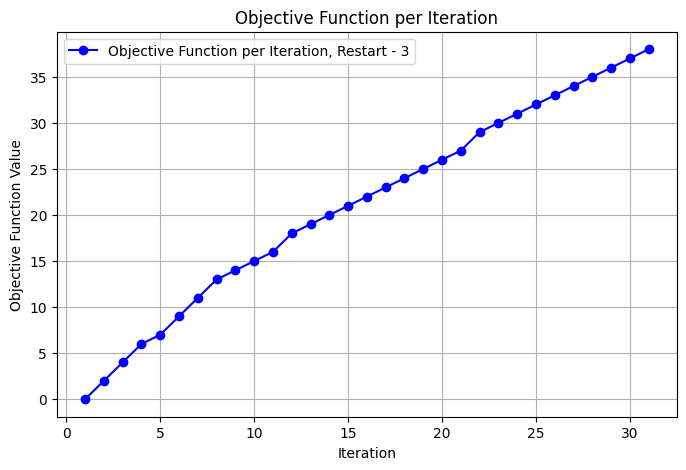

In [108]:
for index,valuePerRestartExperiment in enumerate(valuesPerRestart_tiap_percobaan[1]):
    displayPlotValuePerIteration(valuePerRestartExperiment, f'Objective Function per Iteration, Restart - {index}')

### 3.3. Third Experiment Result

Execution time:  169.2091127920139


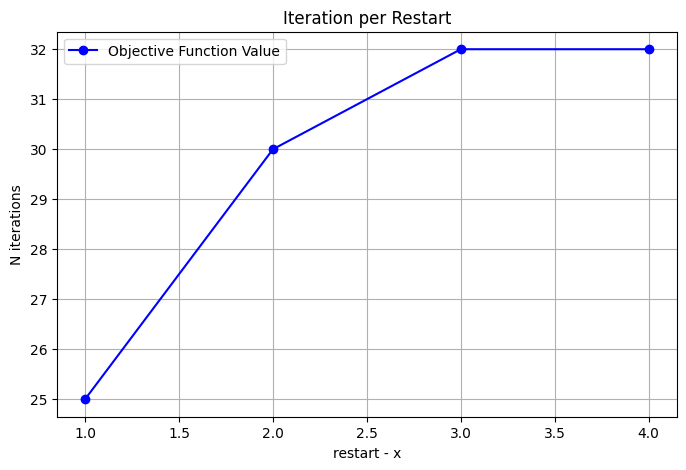

In [109]:
print("Execution time: ", exec_time_each_experiment[2])

displayPlotRestartPerExperiment(iterationPerRestart_tiap_percobaan[2])

#### 3.3.1. Initial State

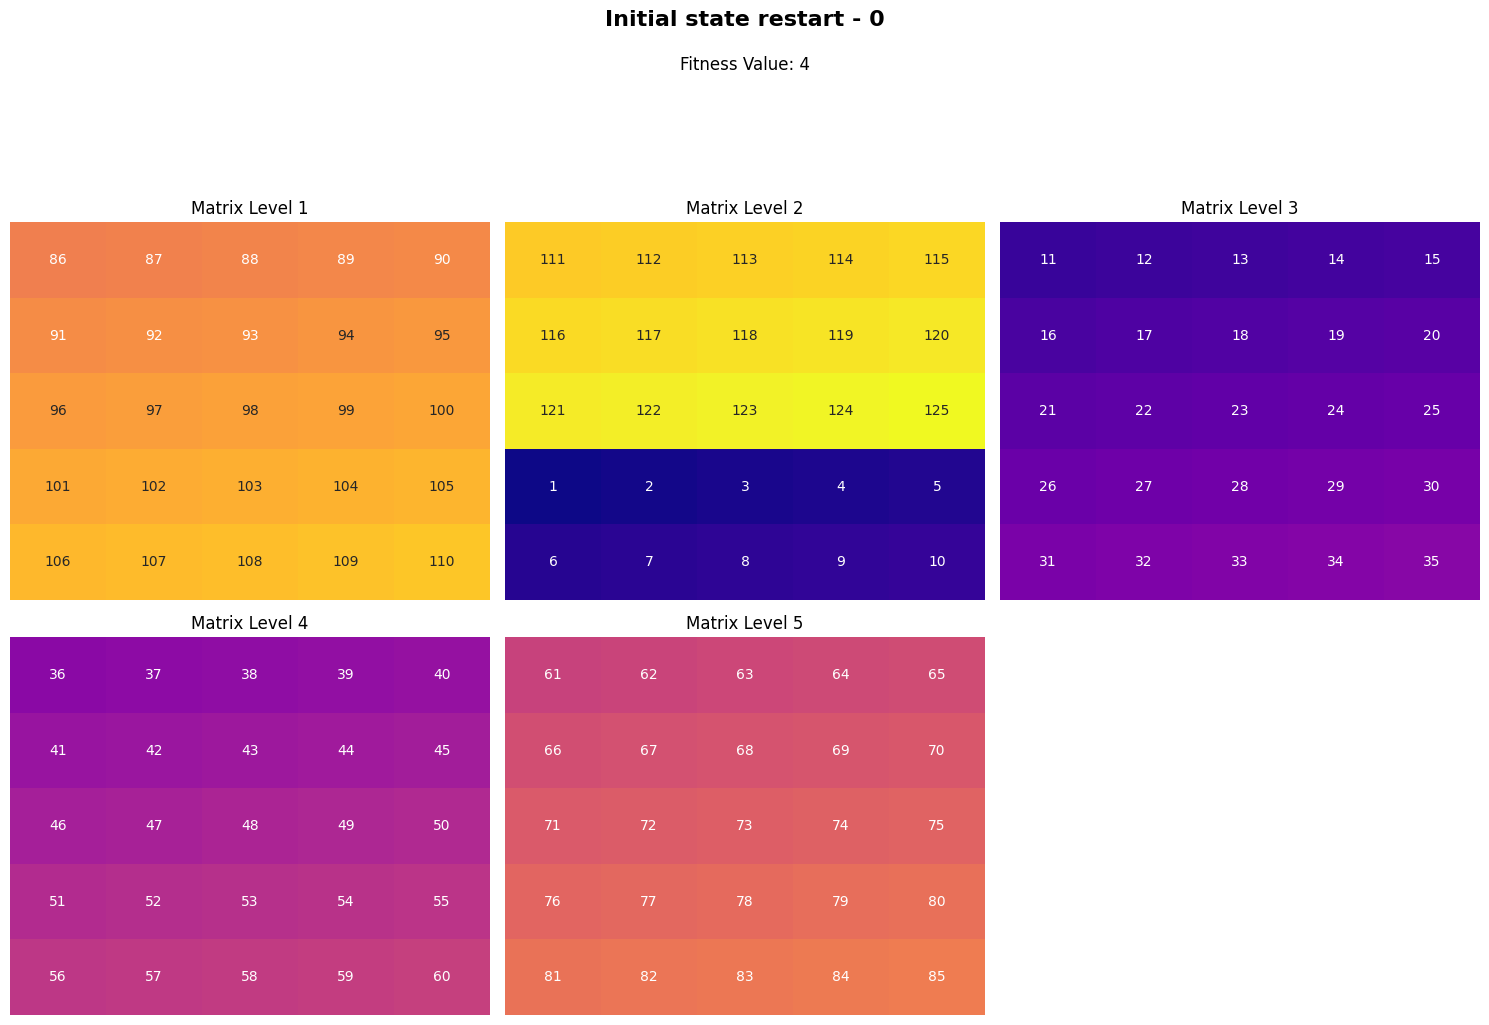

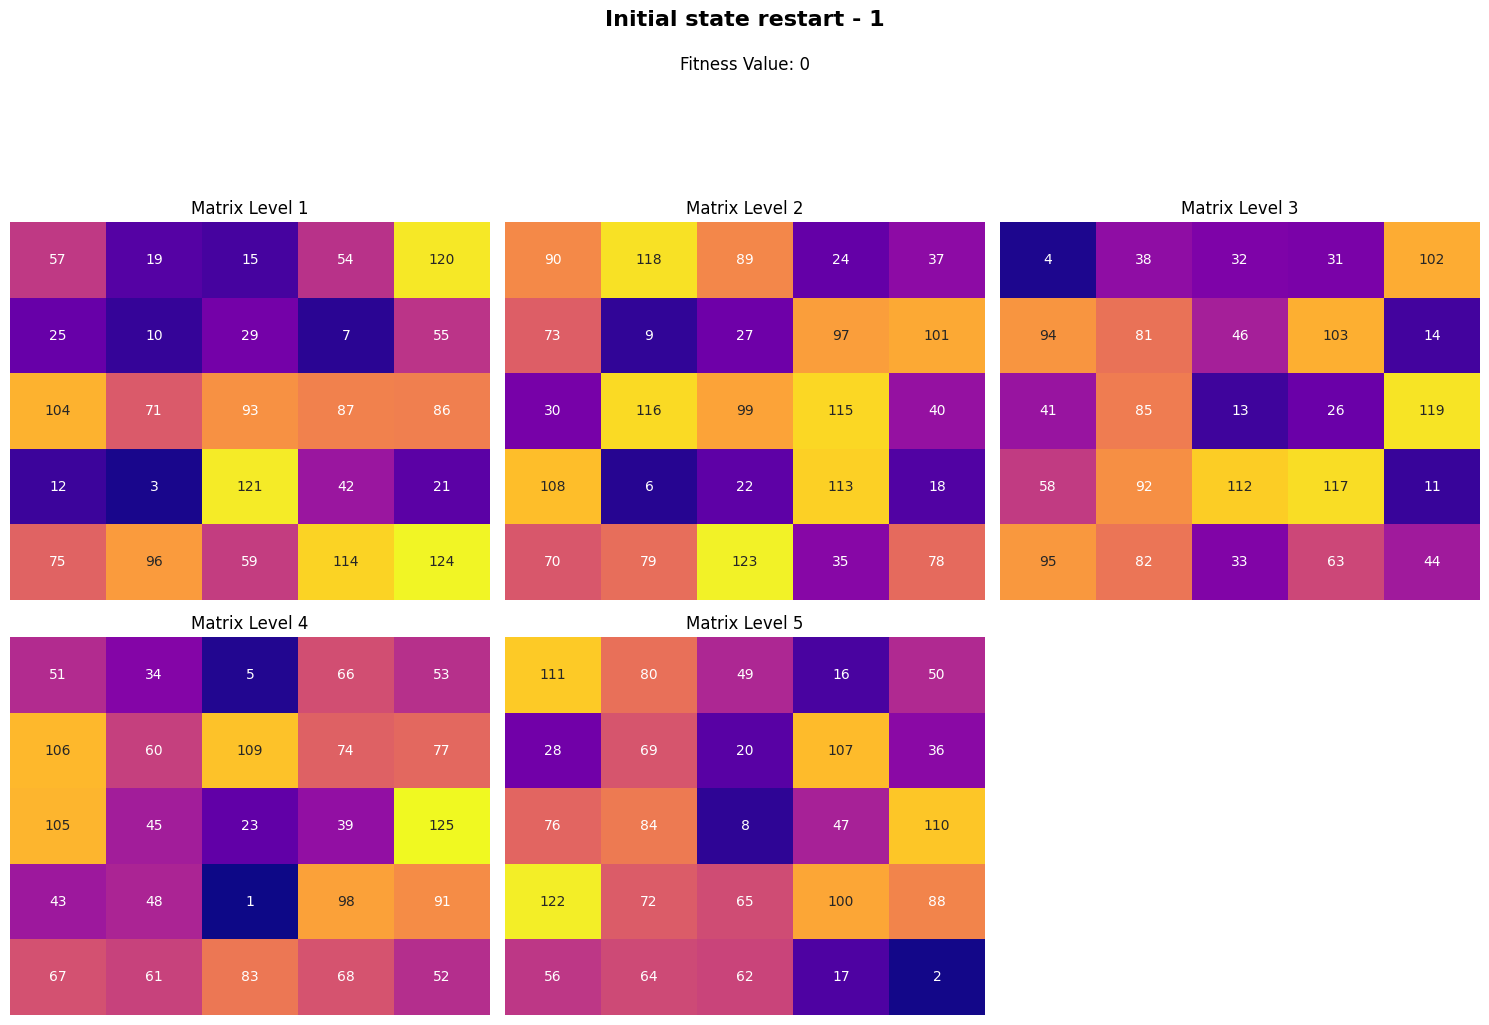

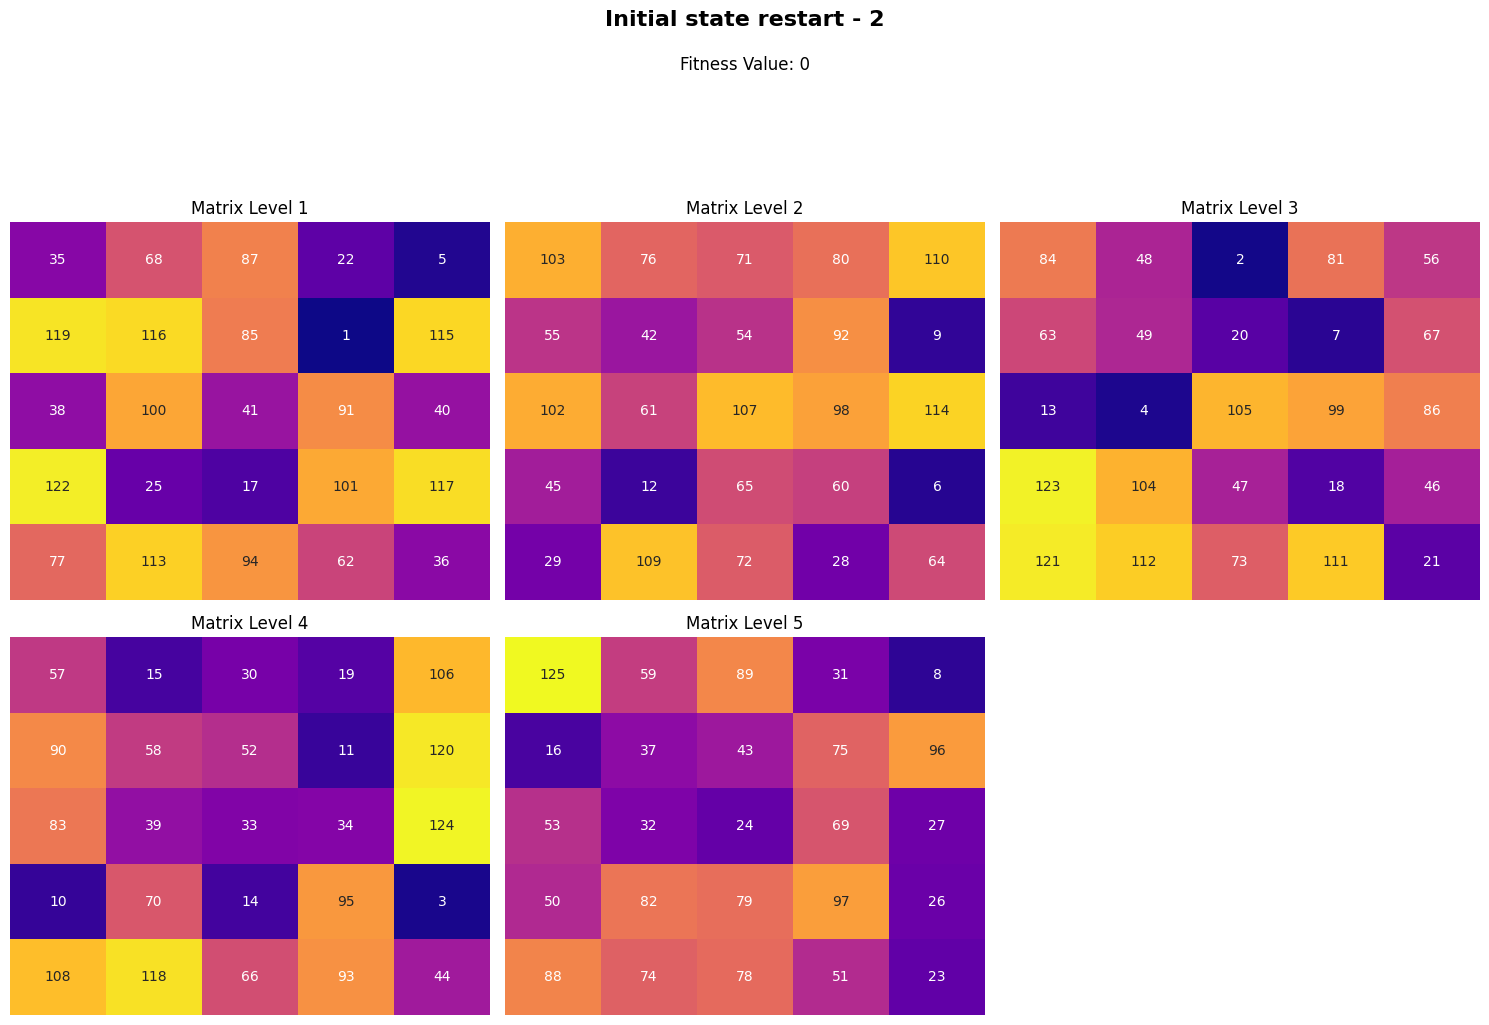

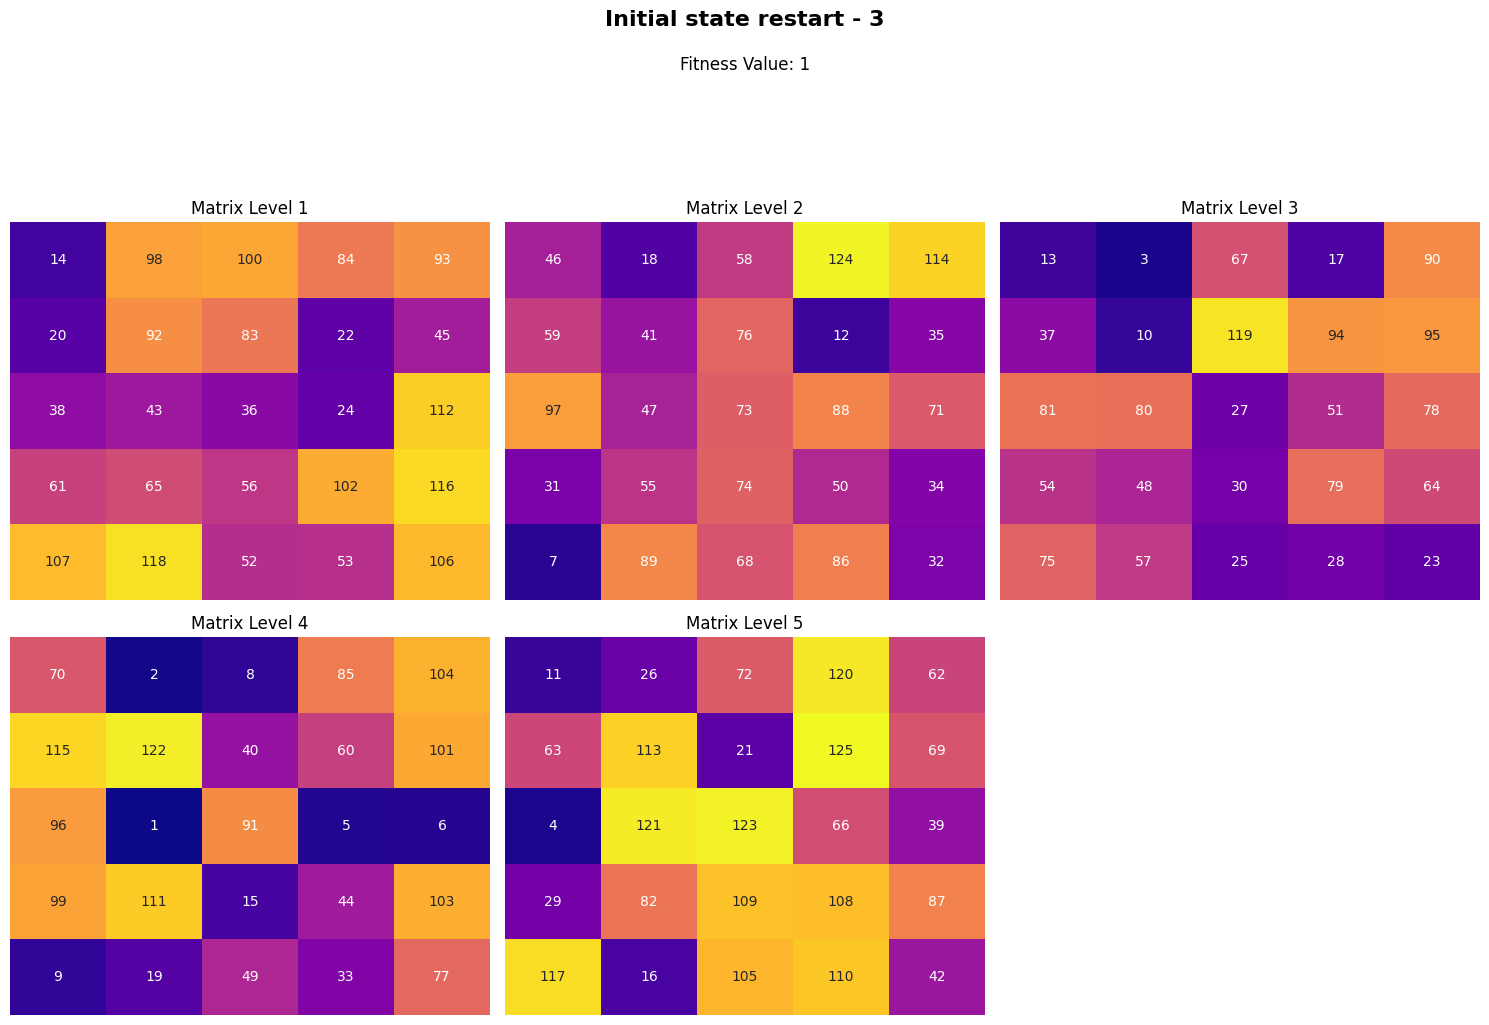

In [110]:
for index, cubesEachRestart in enumerate(cubesPerRestart_tiap_percobaan[2]):
    displayMatrixLayers(cubesEachRestart[0].to_3d_array(), f"Initial state restart - {index}", valuesPerRestart_tiap_percobaan[2][index][0])

#### 3.3.2. Final State

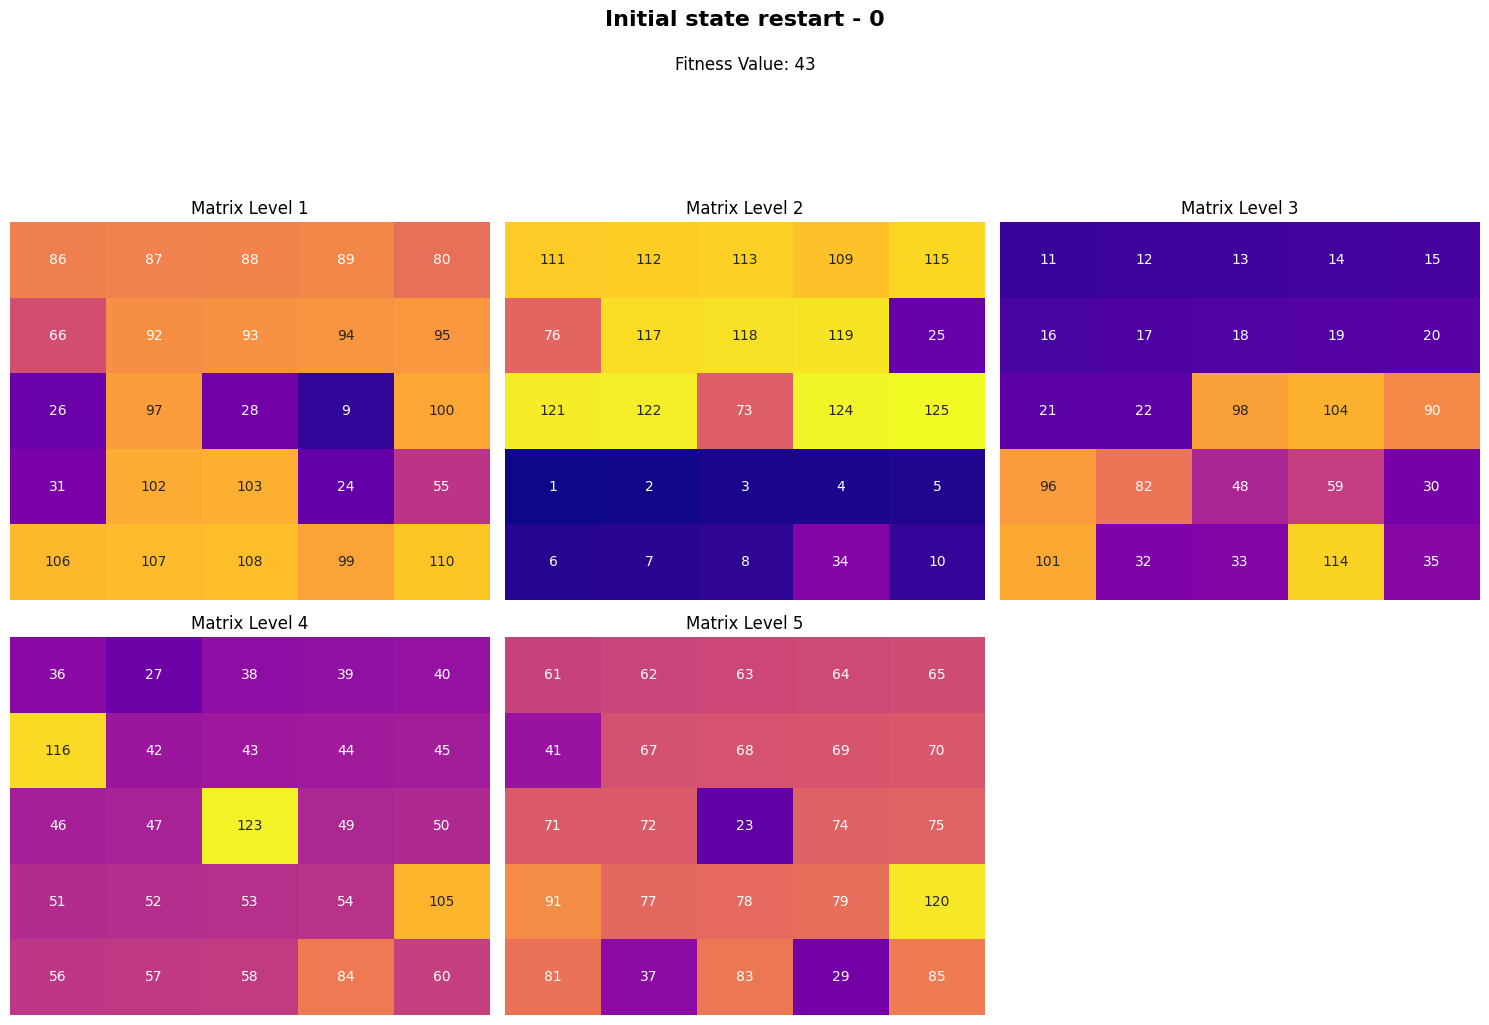

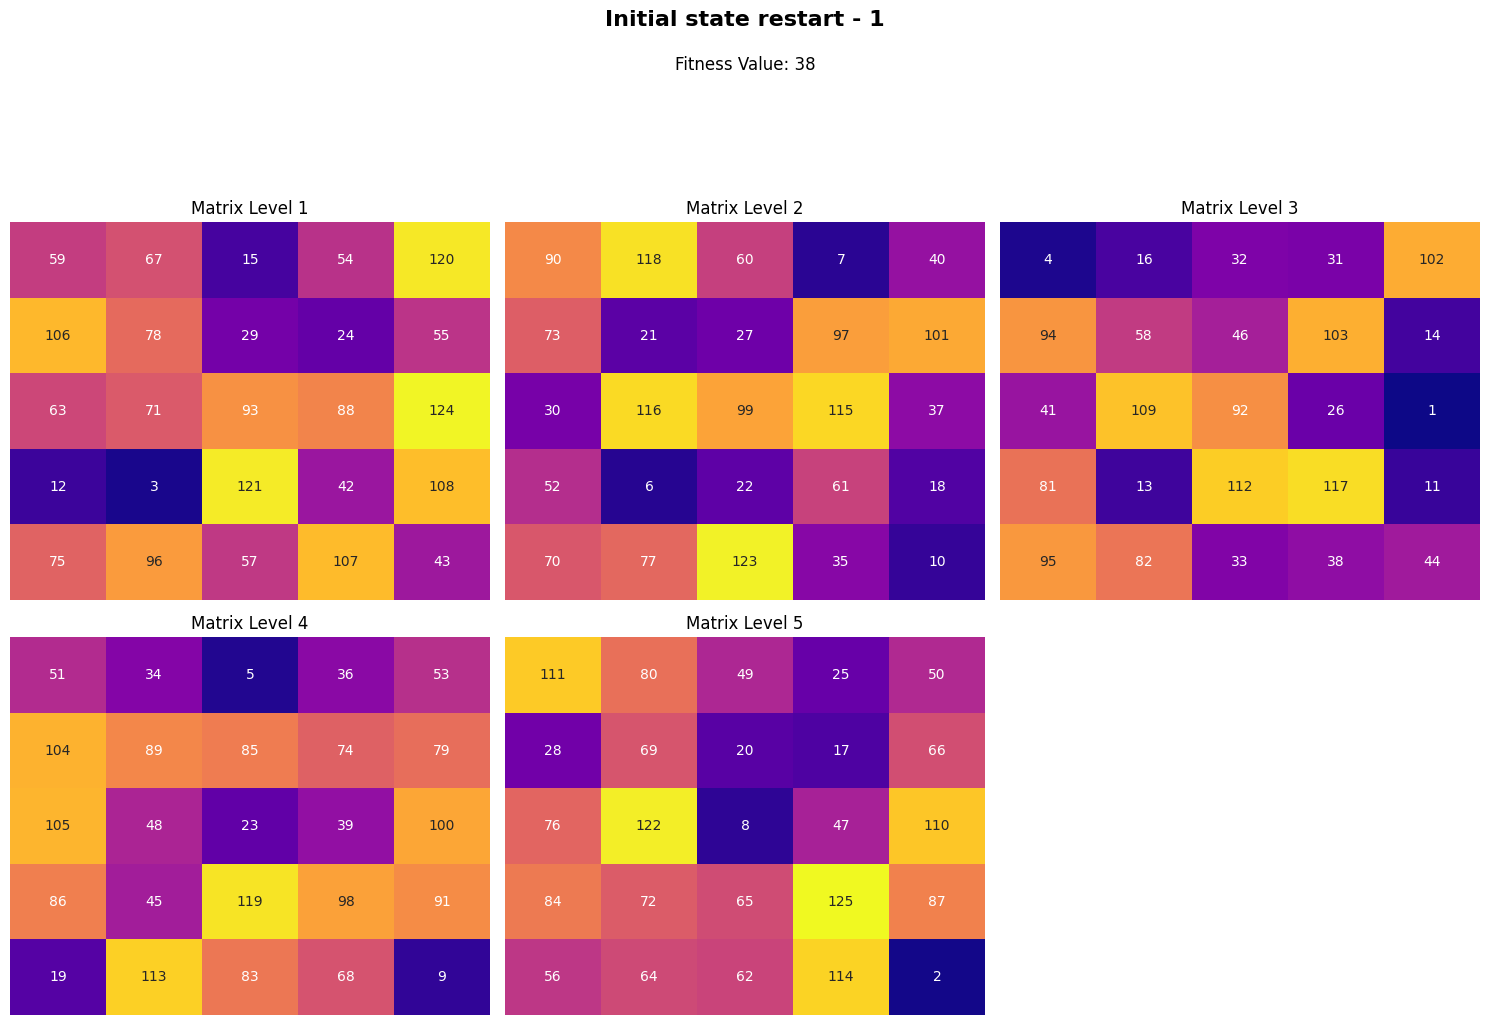

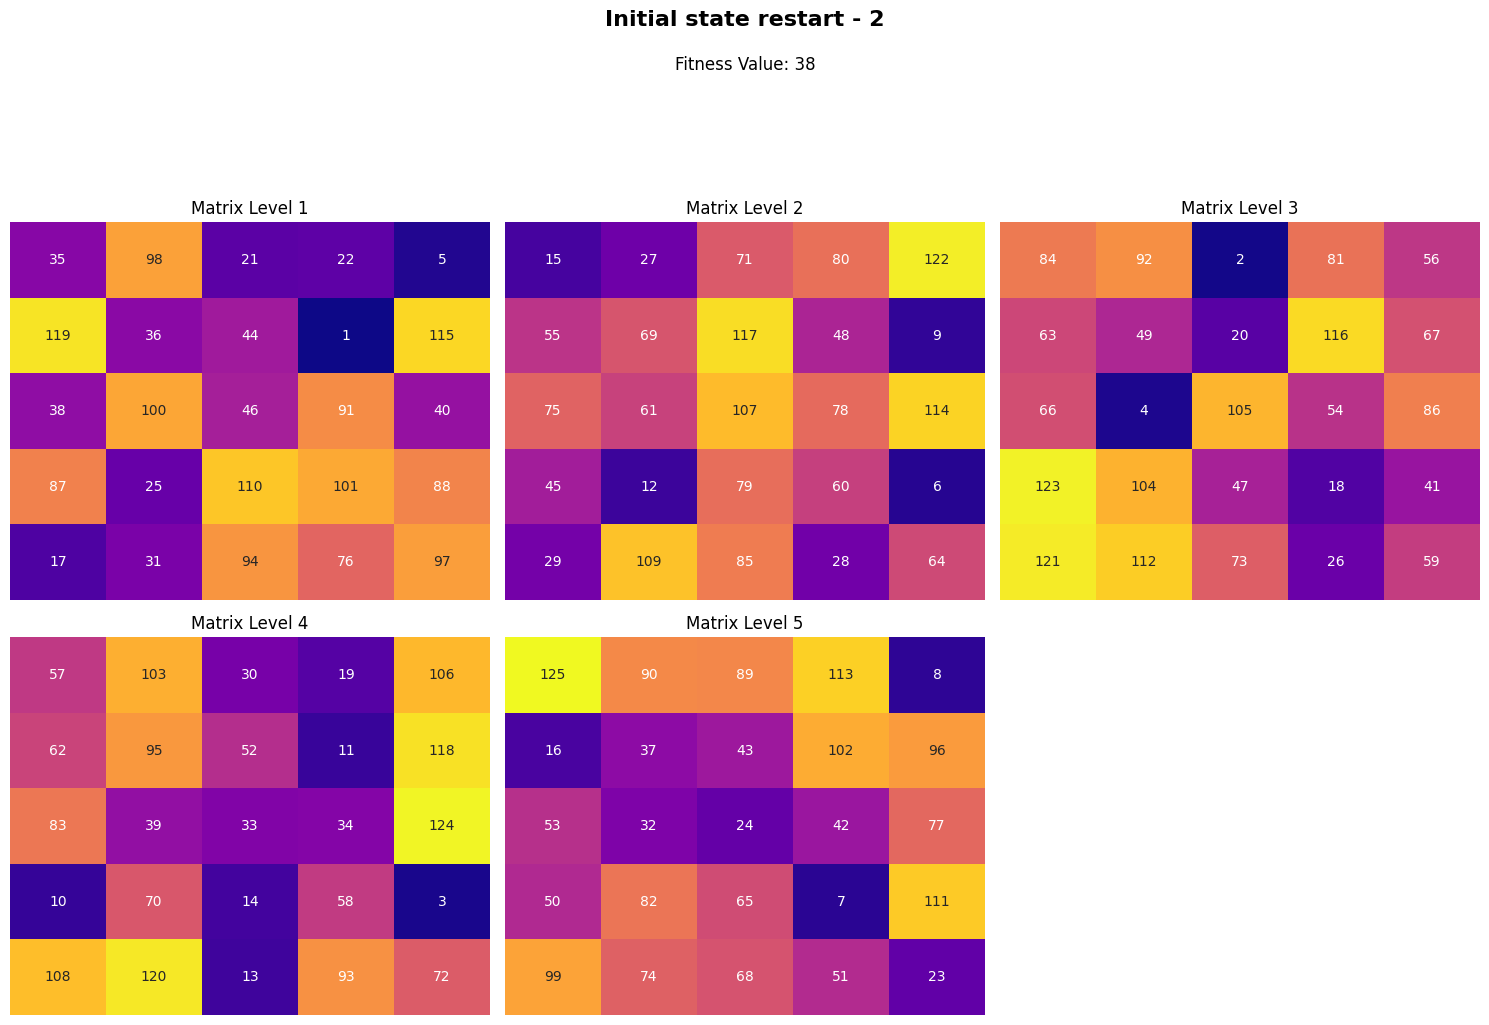

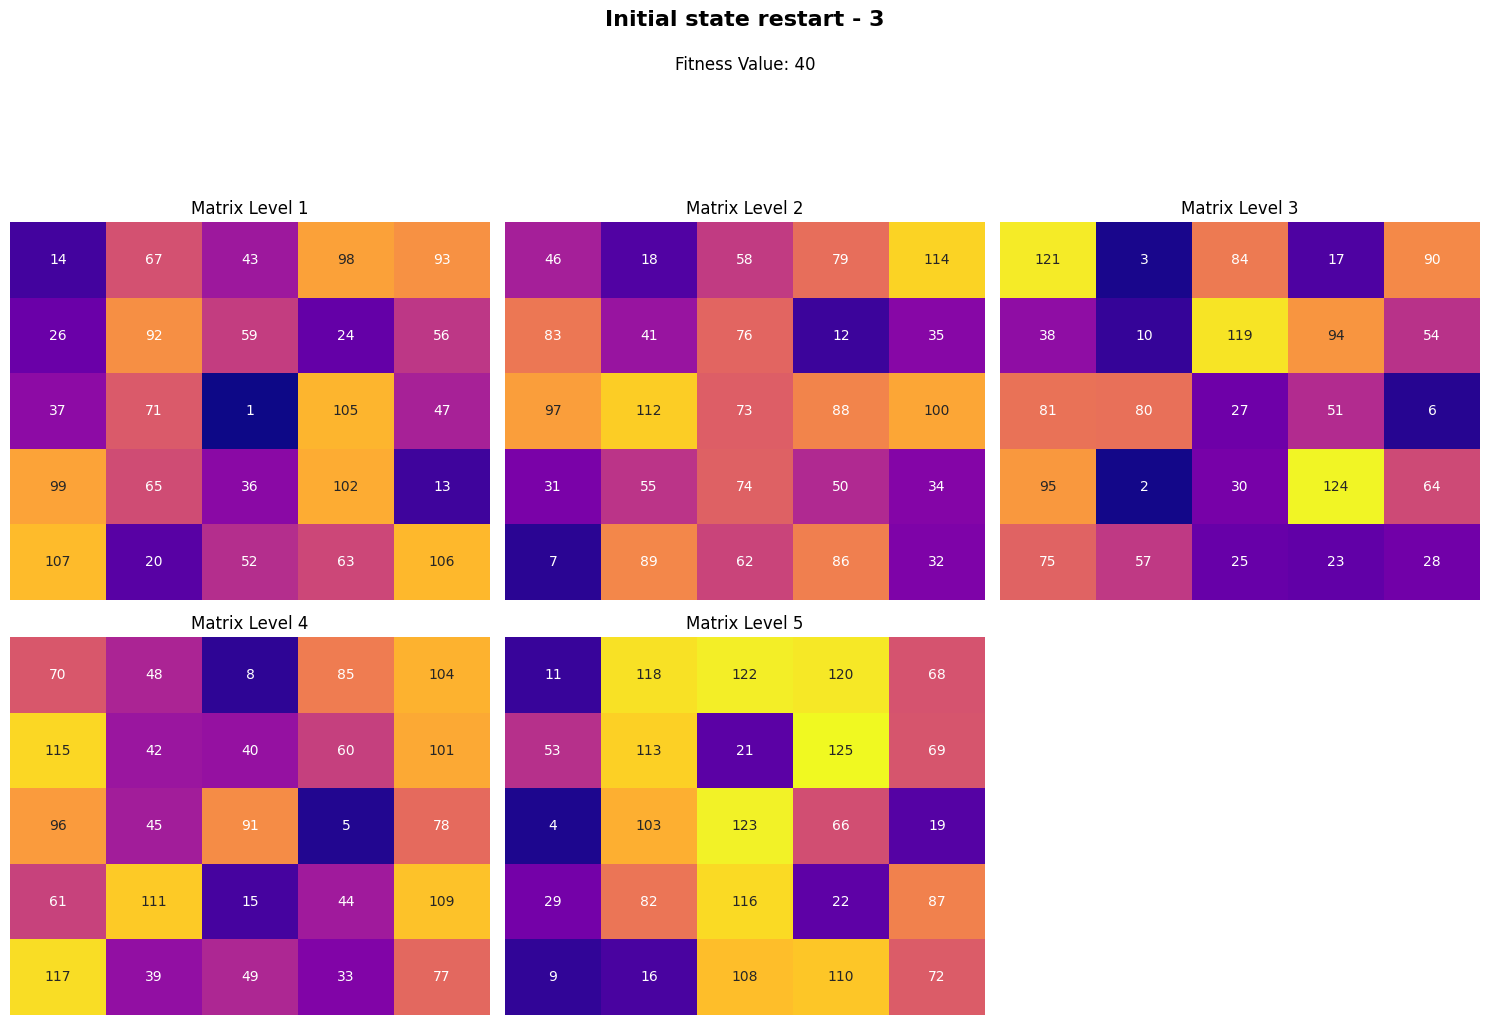

In [111]:
for index, cubesEachRestart in enumerate(cubesPerRestart_tiap_percobaan[2]):
    displayMatrixLayers(cubesEachRestart[-1].to_3d_array(), f"Initial state restart - {index}", valuesPerRestart_tiap_percobaan[2][index][-1])

#### 3.3.3. Objective Function Value Plot on Each Iteration

In [ ]:
for index,valuePerRestartExperiment in enumerate(valuesPerRestart_tiap_percobaan[2]):
    displayPlotValuePerIteration(valuePerRestartExperiment, f'Objective Function per Iteration, Restart - {index}')

## 4. Stochastic Hill-climbing

### 4.0. Program

In [ ]:
from StochasticHillClimbing import StochasticHillClimbingCube
param_iteration = 100
exec_time_each_experiment = []
cubes_tiap_percobaan = []
values_tiap_percobaan = []
iteration_tiap_percobaan = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter = StochasticHillClimbingCube(cube, param_iteration)
    end_time = time.perf_counter()
    
    exec_time_each_experiment(end_time-start_time)
    cubes_tiap_percobaan.append(cubes)
    values_tiap_percobaan.append(values)
    iteration_tiap_percobaan.append(count_iter)

### 4.1. First Experiment Result

In [ ]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", exec_time_each_experiment[0])

#### 4.1.1. Initial State

In [ ]:
displayMatrixLayers(cubes_each_experiment[0][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][0])

#### 4.1.2. Final State

In [ ]:
displayMatrixLayers(cubes_each_experiment[0][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 4.1.3. Objective Function Value Plot on Each Iteration

In [ ]:
displayPlotValuePerIteration(values_each_experiment[0])

### 4.2. Second Experiment Result

In [ ]:
print("Total iteration: ", iteration_each_experiment[1])
print("Execution time: ", exec_time_each_experiment[1])

#### 4.2.1. Initial State

In [ ]:
displayMatrixLayers(cubes_each_experiment[1][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][0])

#### 4.2.2. Final State

In [ ]:
displayMatrixLayers(cubes_each_experiment[1][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 4.2.3. Objective Function Value Plot on Each Iteration

In [ ]:
displayPlotValuePerIteration(values_each_experiment[1])

### 4.3. Third Experiment Result

In [ ]:
print("Total iteration: ", iteration_each_experiment[2])
print("Execution time: ", exec_time_each_experiment[2])

#### 4.3.1. Initial State

In [ ]:
displayMatrixLayers(cubes_each_experiment[2][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][0])

#### 4.3.2. Final State

In [ ]:
displayMatrixLayers(cubes_each_experiment[2][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][-1])

#### 4.3.3. Objective Function Value Plot on Each Iteration

In [ ]:
displayPlotValuePerIteration(values_each_experiment[2])

## 5. Simulated Annealing

### 5.0. Program

In [ ]:
from SimulatedAnnealing import SimulatedAnnealingCube
param_initial_T = 500
param_cooling_rate = 0.9
exec_time_each_experiment = []
cubes_each_experiment = []
values_each_experiment = []
iteration_each_experiment = []
e_probs_each_experiment = [] # nilai e^(deltaE/T) per iterasi tiap percobaan
count_stuck_each_experiment = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter, e_probs, count_stuck = SimulatedAnnealingCube(cube, param_initial_T, param_cooling_rate)
    end_time = time.perf_counter()
    exec_time_each_experiment.append(end_time-start_time)
    
    cubes_each_experiment.append(cubes)
    values_each_experiment.append(values)
    iteration_each_experiment.append(count_iter)
    e_probs_each_experiment.append(e_probs)
    count_stuck_each_experiment.append(count_stuck)

### 5.1. First Experiment Result

In [ ]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", exec_time_each_experiment[0])

#### 5.1.1. Initial State

In [ ]:
displayMatrixLayers(cubes_each_experiment[0][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][0])

#### 5.1.2. Final State

In [ ]:
displayMatrixLayers(cubes_each_experiment[0][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 5.1.3. Objective Function Value Plot on Each Iteration

In [ ]:
displayPlotValuePerIteration(values_each_experiment[0])
displayPlotProbabilityMove(e_probs_each_experiment[0])

### 5.2. Second Experiment Result

In [ ]:
print("Total iteration: ", iteration_each_experiment[1])
print("Execution time: ", exec_time_each_experiment[1])

#### 5.2.1. Initial State

In [ ]:
displayMatrixLayers(cubes_each_experiment[1][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][0])

#### 5.2.2. Final State

In [ ]:
displayMatrixLayers(cubes_each_experiment[1][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 5.2.3. Objective Function Value Plot on Each Iteration

In [ ]:
displayPlotValuePerIteration(values_each_experiment[1])
displayPlotProbabilityMove(e_probs_each_experiment[1])

### 5.3. Third Experiment Result

In [ ]:
print("Total iteration: ", iteration_each_experiment[2])
print("Execution time: ", exec_time_each_experiment[2])

#### 5.3.1. Initial State

In [ ]:
displayMatrixLayers(cubes_each_experiment[2][0].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][0])

#### 5.3.2. Final State

In [ ]:
displayMatrixLayers(cubes_each_experiment[2][-1].to_3d_array())
print("Objective Function Value: ", values_each_experiment[2][-1])

#### 5.3.3. Objective Function Value Plot on Each Iteration

In [ ]:
displayPlotValuePerIteration(values_each_experiment[2])
displayPlotProbabilityMove(e_probs_each_experiment[2])

## 6. Genetic Algorithm

### 6.0. Program

In [ ]:
from GeneticAlgorithm import genetic
exec_time_each_experiment = []
cubes_each_experiment = []
values_each_experiment = []
iteration_each_experiment = []


### 6.1. First Experiment Result

#### 6.1.1. Initial State

#### 6.1.2. Final State

#### 6.1.3. Objective Function Value Plot on Each Iteration

### 6.2. Second Experiment Result

#### 6.2.1. Initial State

#### 6.2.2. Final State

#### 6.2.3. Objective Function Value Plot on Each Iteration

### 6.3. Third Experiment Result

#### 6.3.1. Initial State

#### 6.3.2. Final State

#### 6.3.3. Objective Function Value Plot on Each Iteration